In this part, you are going to implement a two-layer fully connected autoencoder on MNIST handwritten digits dataset without any deep learning libraries, using numpy only.

Important notes:

- Variables are named in this assignmend regarding following conventions:

     - Constants are named with uppercase words separated with underscores. eg. `INPUT_SIZE`, `LEARNING_RATE`.

     - Derivative of variables are named as variable name with `D_` prefix. For example, `D_x` indicates $\frac{\partial x}{\partial loss}$

     - Output of a layer n before activation function is denoted as `hn`. For example, output of first layer before activation is denoted as `h1`. 

     - Similarly, output of a layer n after activation function is denoted as `on`. For example, output of first layer after activation is denoted as `o1`. 


- The parts you need to fill in are marked with `##FILL HERE` comments. You should only change the lines marked with this comment. Also, you should not change the variable names in the marked lines.

- Try to use 'vectorized' code, that is, avoid for loops as much as possible and use vector and matrix operations instead. Not only performance of your code will be much higher, but also conforming to vectorized mindset makes everything easier for you when dealing with data science/machine learning problems.

- Recommended watch before starting the assignment, https://www.youtube.com/watch?v=lFOOjeH2wsY

# 1) Boilerplate, imports, data loading

In [0]:
%tensorflow_version 1.x
from mmi727_utils import load_dataset, test_relu, test_sigmoid, test_mean_squared_error, test_sigmoid_backward, test_weights
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load_dataset function; 
# - takes training set of MNIST dataset from tf datasets,
# - flattens 28x28 images to 784 dimensional vectors
# - scales training instances between 0 and 1
# note: Since you are implementing an autoencoder, labes

X = load_dataset()


TensorFlow 1.x selected.


# 2) Initialize Weights



Randomly initialize layer 1 and layer 2 weights as 2D numpy arrays with zero mean and 0.01 standard deviation. For simplicity, biases are omitted.

In [0]:
INPUT_SIZE  = X.shape[1]
HIDDEN_SIZE = 64

w1 = np.random.normal(0, 0.01, (INPUT_SIZE, HIDDEN_SIZE)) ## FILL HERE ##
w2 = np.random.normal(0, 0.01, (HIDDEN_SIZE, INPUT_SIZE)) ## FILL HERE ##


# 3) Define activation functions 

In this part, we will define the necessary function in numpy. Note that all functions need to operate on batches, not single instances. As a convention, first dimension of all tensors will be the batch dimension. 

Define relu and sigmoid activation functions in forward mode.

In [0]:
def relu(x):
    ################
    ### FILL HERE ##
    ################
    return np.maximum(x, 0)

In [0]:
def sigmoid(x):
    ################
    ### FILL HERE ##
    ################
    return 1 / (1 + np.exp(-x))


# 4.a) Define activation functions in 'backward mode'
Suppose you know the derivative of a function's output with respect to the loss, which is $\frac{\partial loss}{\partial f(x)}$. Backward mode of a function takes $\frac{\partial loss}{\partial f(x)}$ (```D_output``` argument) and gives derivatives of its input with respect to the loss $\frac{\partial loss}{\partial x}$. 

Backward mode of relu is defined below. Using this as an example, sigmoid activation function in backward mode. You are going to use these functions to implement backpropagation. 



In [0]:
#Note: If you are confused about D_output means, read the notes at the top of the page.
def relu_backward(D_output, output):
    '''
    relu_backward: Backward mode of relu activation function
    
    Arguments;
    D_output: Derivative of output of relu with respect to loss.
    output  : Output of relu activation function
    
    Returns;
    Derivative of input of relu function with respect to loss.
    '''
    ################
    ### FILL HERE ##
    ################

    return D_output * np.where(output <= 0, 0, 1).astype('float64')

In [0]:
def sigmoid_backward(D_output, output):    
    '''
    sigmoid_backward: Backward mode of sigmoid activation function
    
    Arguments;
    D_output: Derivative of output of sigmoid with respect to loss.
    output  : Output of sigmoid activation function
    
    Returns;
    Derivative of input of sigmoid function with respect to loss.
    '''
    ################
    ### FILL HERE ##
    ################
    return D_output * output * (1 - output)

# 4.b) Define loss function


Define the function computing mean squared error metric, given outputs and targets.

In [0]:
def mean_squared_error(outputs, targets):
    squared_errors = (np.square(outputs - targets))## FILL HERE ##
    return np.mean(squared_errors)

# 5) Sanity Check
Since Part 6 will be a little more difficult than the other parts, make sure everything is correct so far using test scripts before proceeding Part 6,(just run the cell below). If anything is incorrect with your implementations, do not start implementing part 6 before fixing the mistakes and making sure everything works as intended.

Note: Don't forget to run cells after making changes in them or you may re-test your old implementations unintentionally.

In [0]:
test_weights(w1, w2, INPUT_SIZE, HIDDEN_SIZE)
test_relu(relu)
test_sigmoid(sigmoid)
test_sigmoid_backward(sigmoid_backward)
test_mean_squared_error(mean_squared_error)

Success: Weights are initialized properly.
Success: 'relu' is implemented properly.
Success: 'sigmoid' is implemented properly.
Success: 'sigmoid_backward' is implemented properly.
Success: 'mean_squared_error' is implemented properly.


# 6) Training

Set hyperparameters

In [0]:
BATCH_SIZE = 1024
NUM_EPOCHS = 10
LEARNING_RATE = 0.0001

Calculate how many iterations will be done per epoch.

Hint: You may want to use `//` operator, which does integer division in Python 3.

In [0]:
NUM_TRAINING_INSTANCES = X.shape[0]

In [0]:
ITERATIONS_PER_EPOCH = NUM_TRAINING_INSTANCES // BATCH_SIZE ## FILL HERE ##

In [0]:
import os
if not os.path.exists('output'):
    os.makedirs('output')

Training loop mainly consists of 4 steps

1) Sample batch from dataset

2) Forward propagation

3) Backpropagation

4) Parameter updates

1st and 4th steps are implemented. You are expected to implement forward propagation and backpropagation using the functions you defined above. 

- You can use ```@``` operator or ```np.dot``` function for matrix multiplication.
- Note that you have implemented every backward operation needed, except matrix multiplication. Find out what is the backward mode of matrix multiplication operation. Or derive it, if you feel adventurous.

Epoch 1, Iteration 0 -- Loss: 0.231331
Epoch 1, Iteration 1 -- Loss: 0.230440
Epoch 1, Iteration 2 -- Loss: 0.209267
Epoch 1, Iteration 3 -- Loss: 0.076537
Epoch 1, Iteration 4 -- Loss: 0.077755
Epoch 1, Iteration 5 -- Loss: 0.092599
Epoch 1, Iteration 6 -- Loss: 0.091571
Epoch 1, Iteration 7 -- Loss: 0.086736
Epoch 1, Iteration 8 -- Loss: 0.087138
Epoch 1, Iteration 9 -- Loss: 0.082729
Epoch 1, Iteration 10 -- Loss: 0.082402
Epoch 1, Iteration 11 -- Loss: 0.075818
Epoch 1, Iteration 12 -- Loss: 0.079722
Epoch 1, Iteration 13 -- Loss: 0.079550
Epoch 1, Iteration 14 -- Loss: 0.072231
Epoch 1, Iteration 15 -- Loss: 0.071040
Epoch 1, Iteration 16 -- Loss: 0.070839
Epoch 1, Iteration 17 -- Loss: 0.067975
Epoch 1, Iteration 18 -- Loss: 0.070645
Epoch 1, Iteration 19 -- Loss: 0.074441
Epoch 1, Iteration 20 -- Loss: 0.072571
Epoch 1, Iteration 21 -- Loss: 0.071198
Epoch 1, Iteration 22 -- Loss: 0.070087
Epoch 1, Iteration 23 -- Loss: 0.066953
Epoch 1, Iteration 24 -- Loss: 0.065291
Epoch 1, I

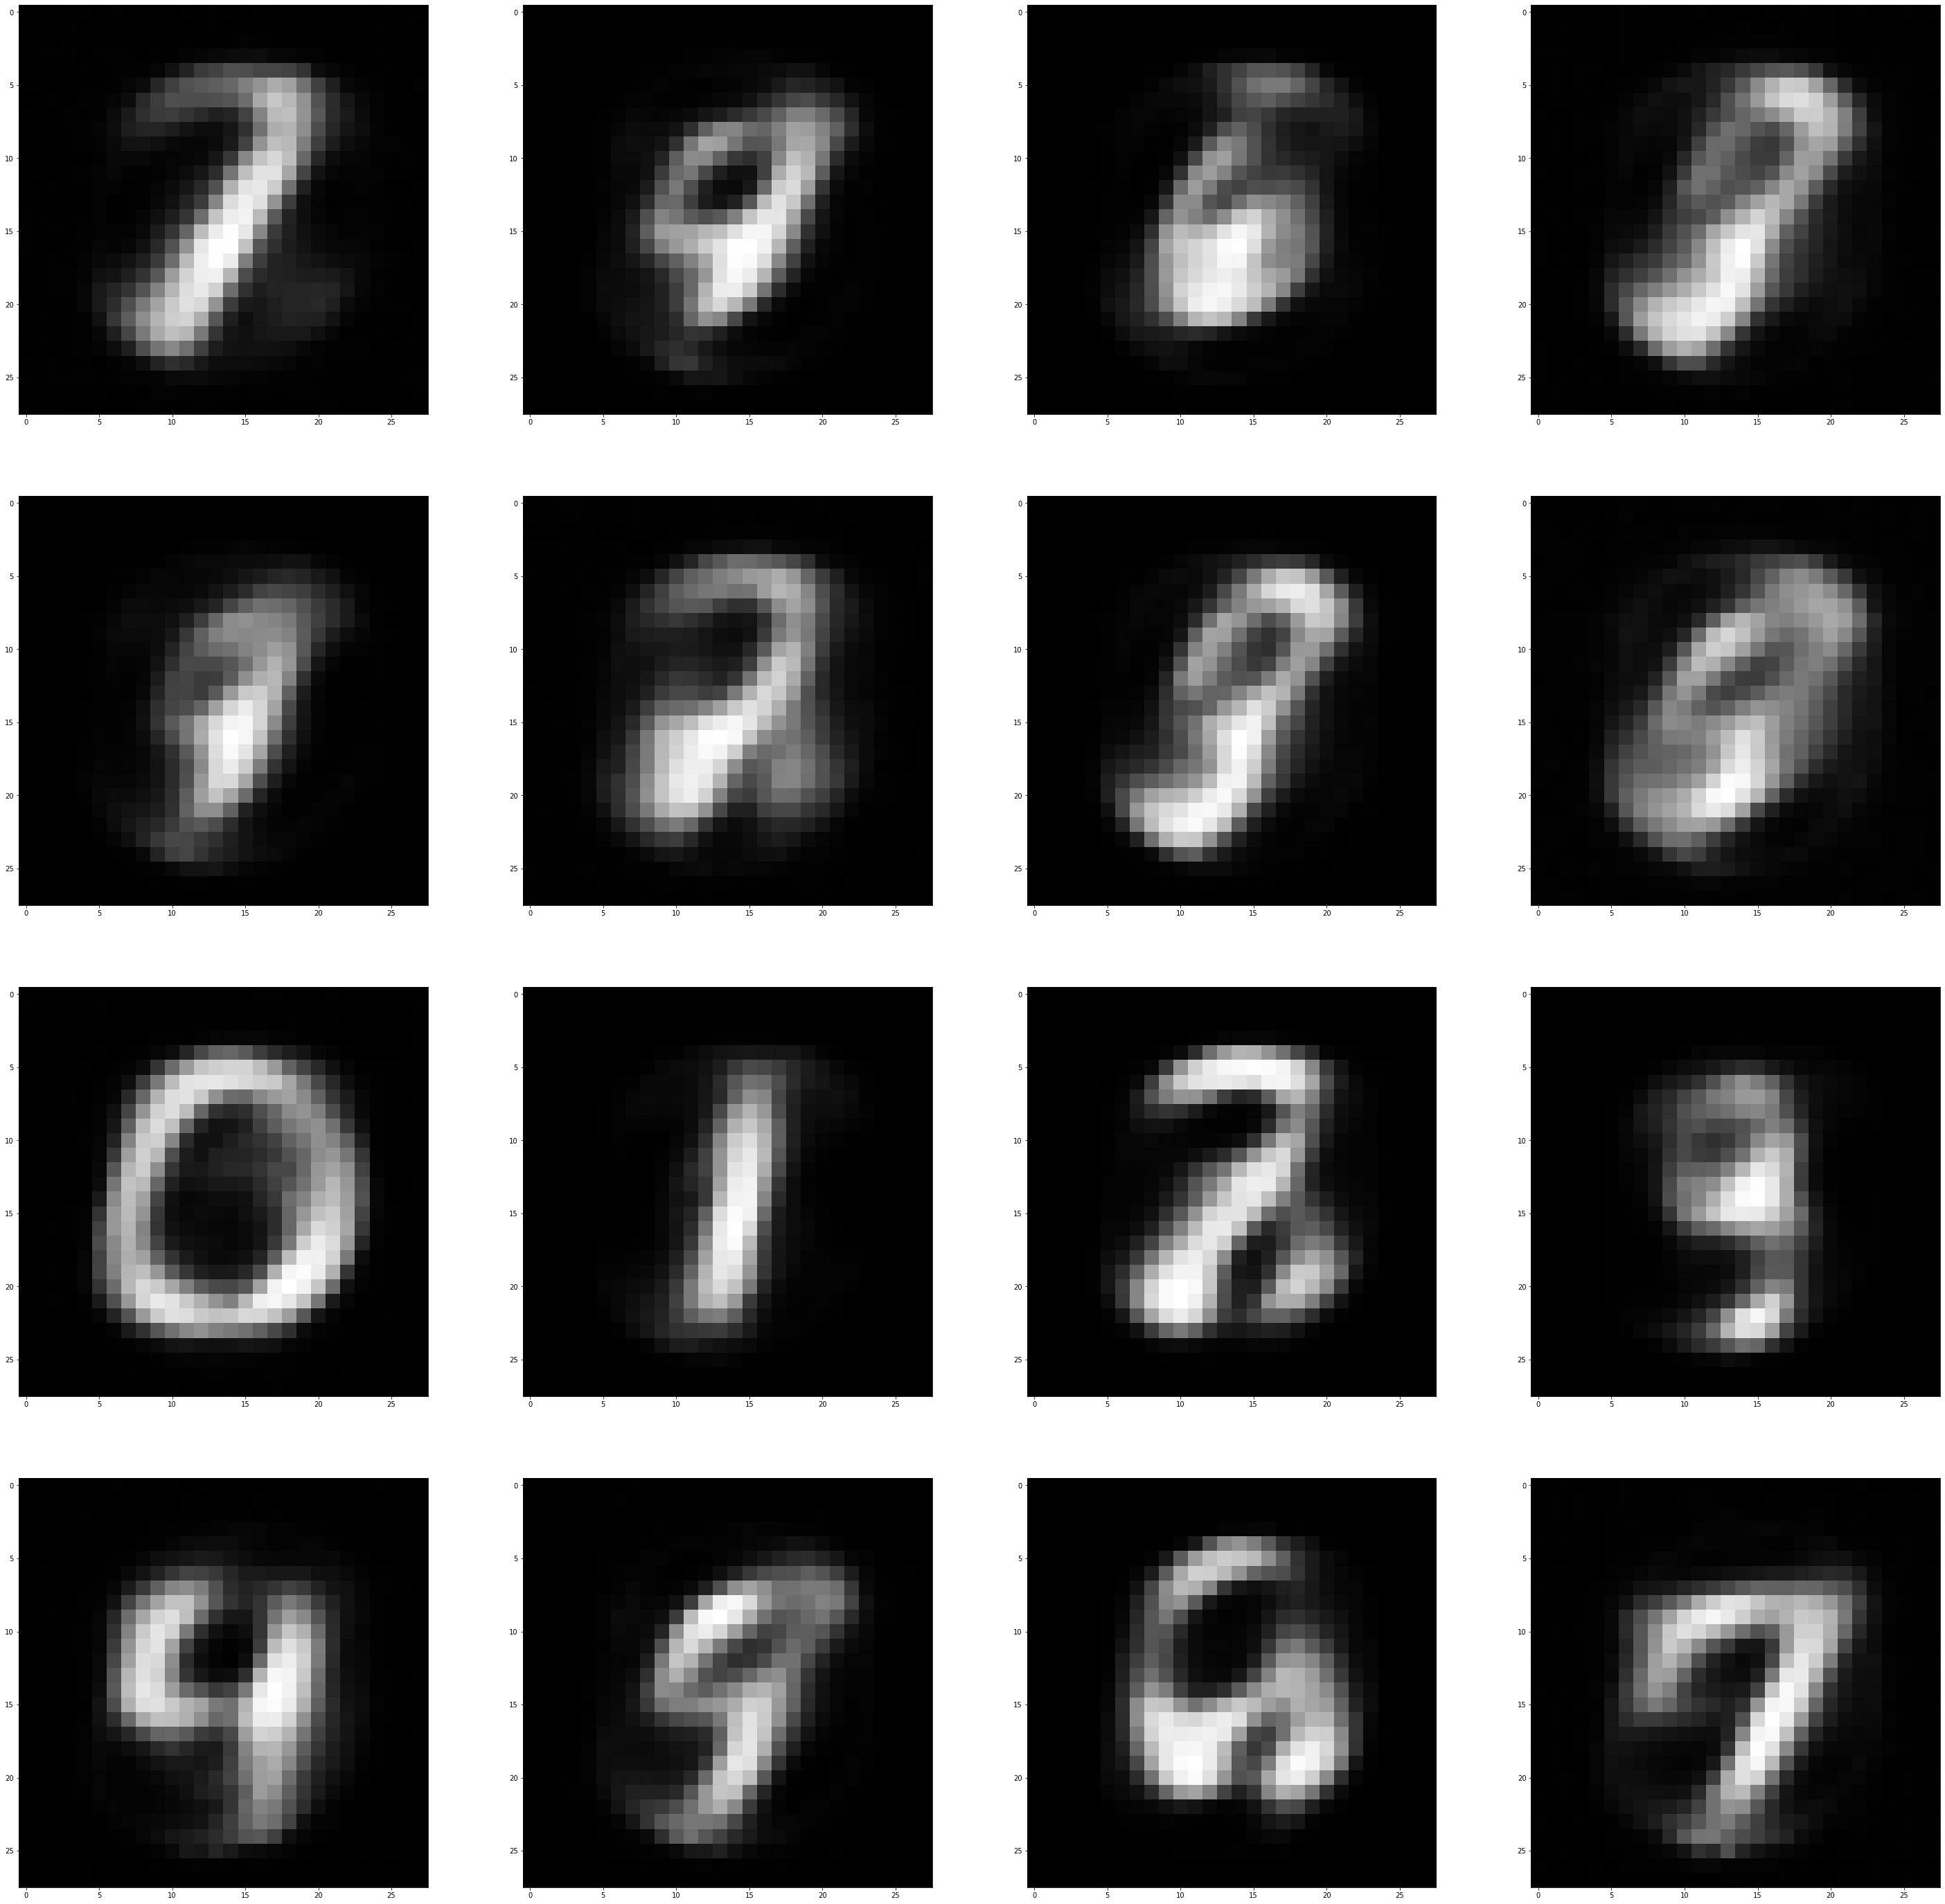

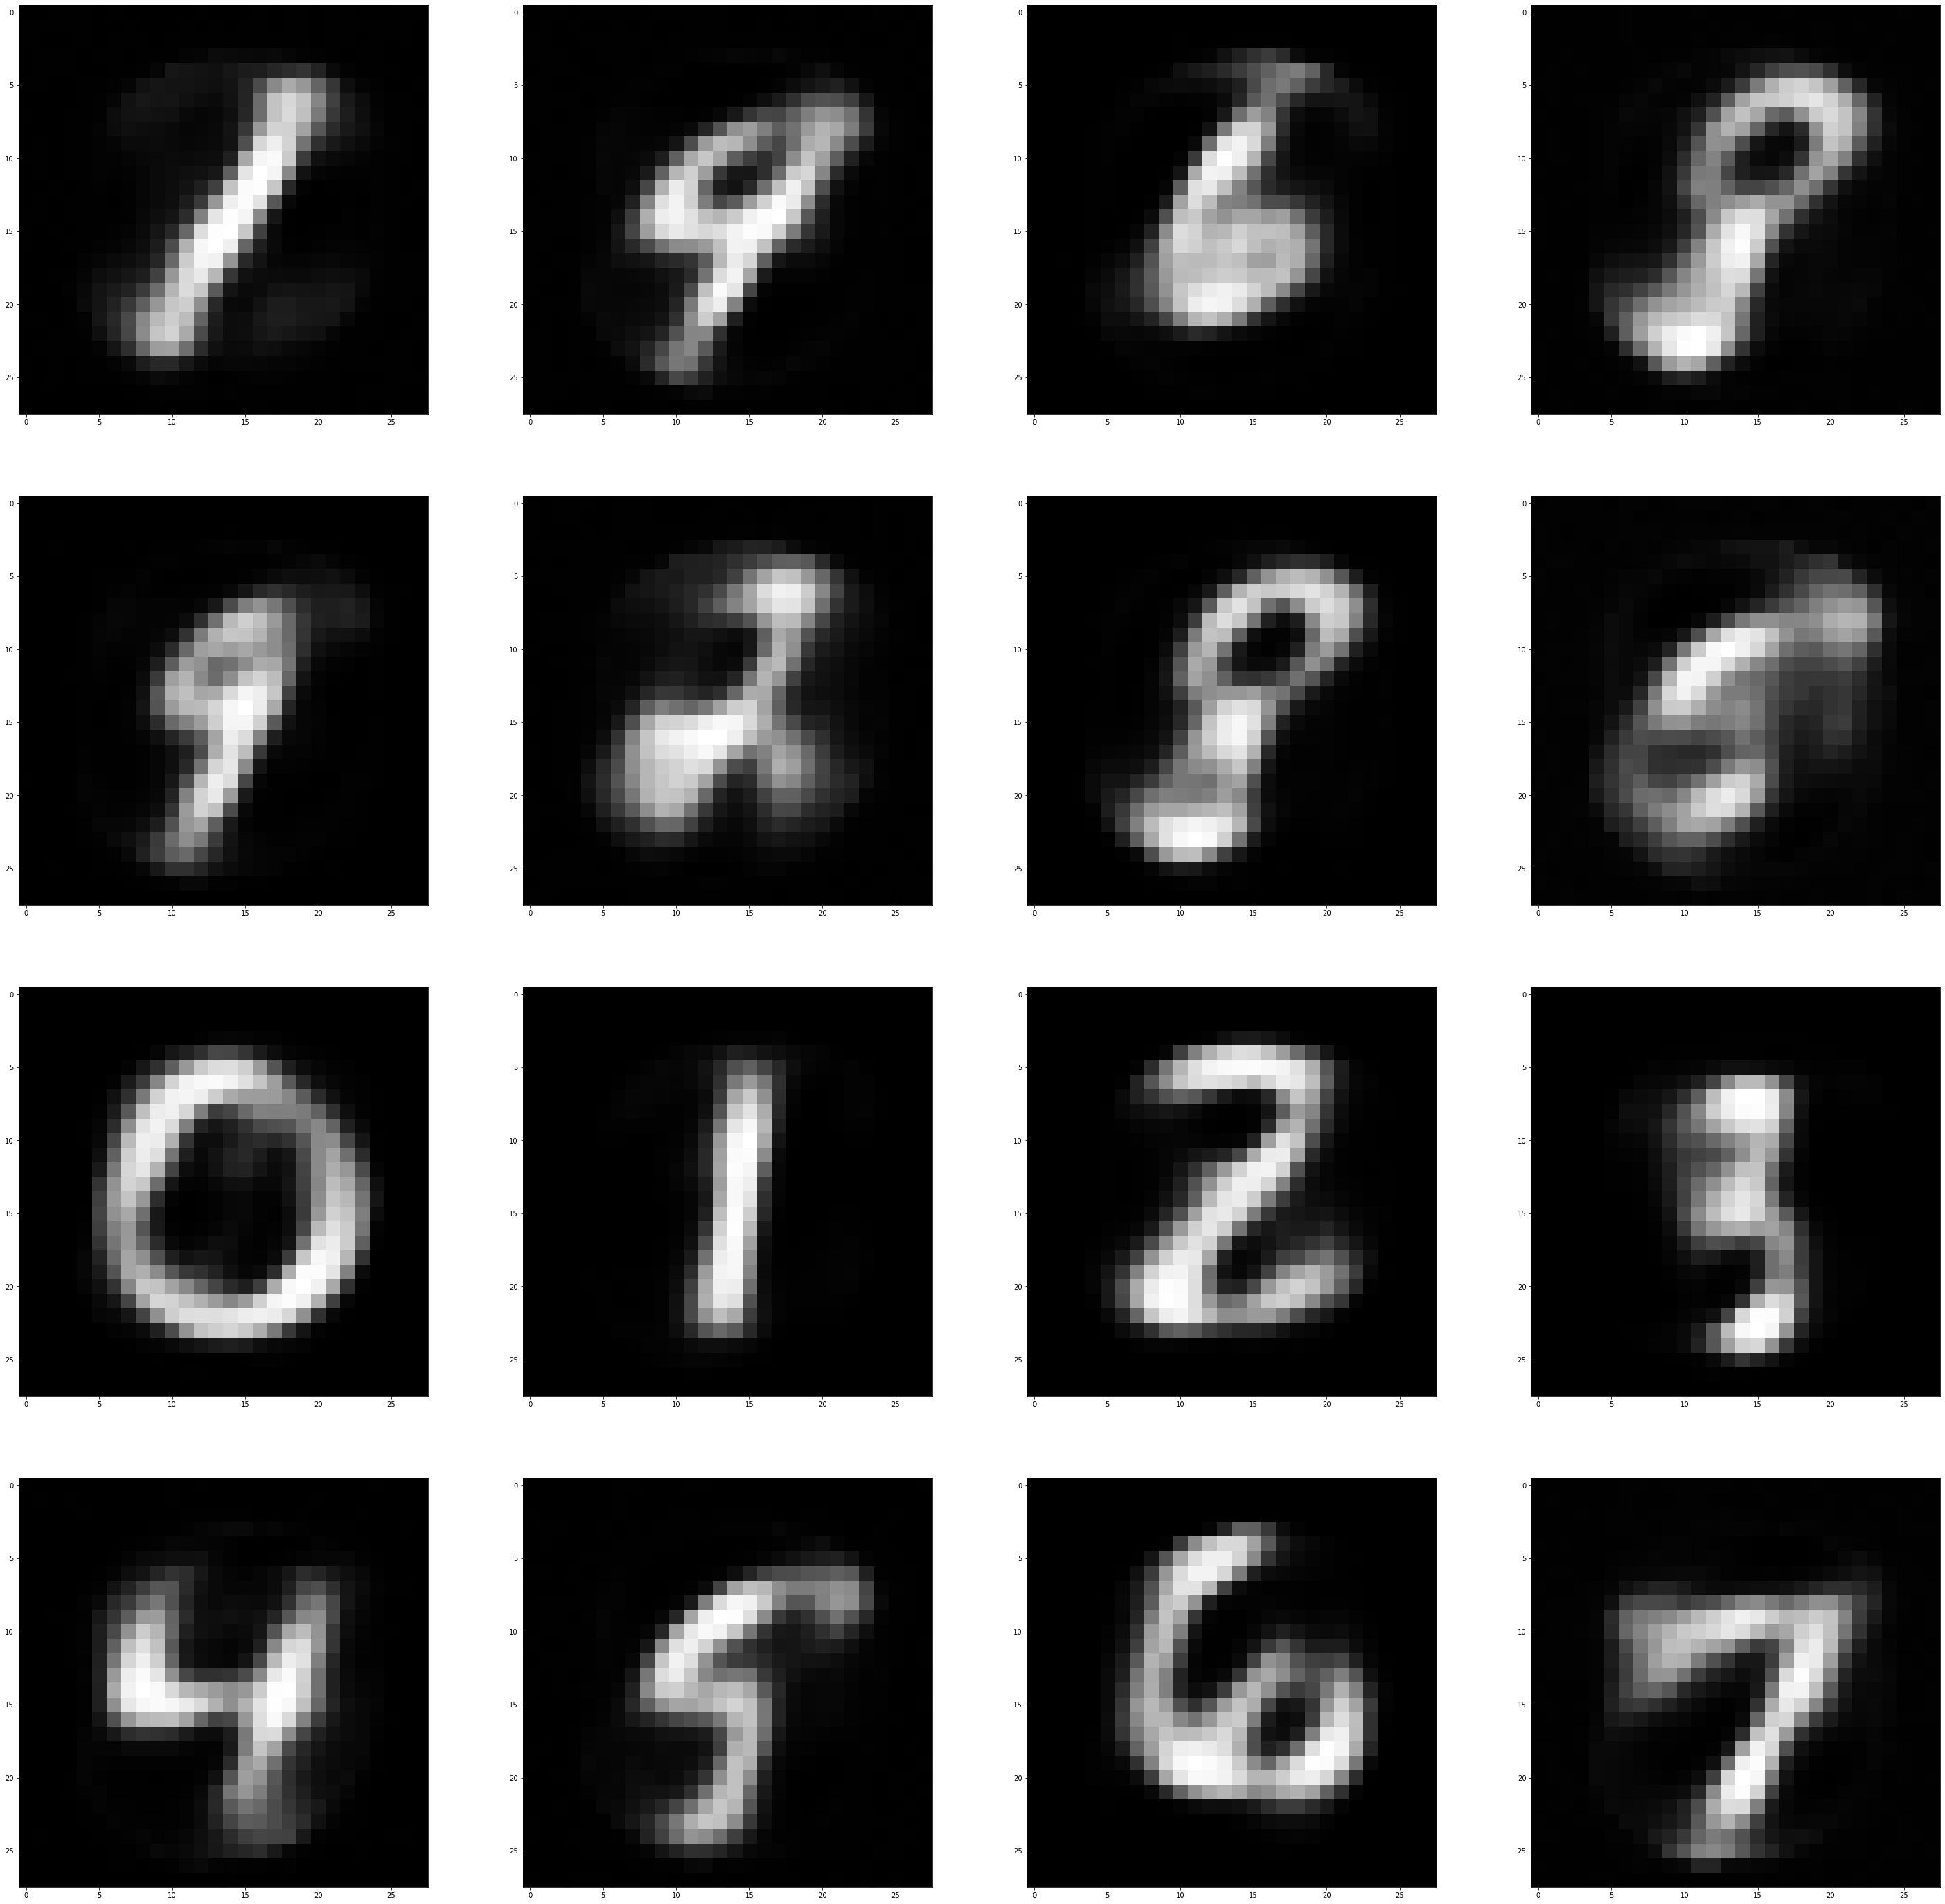

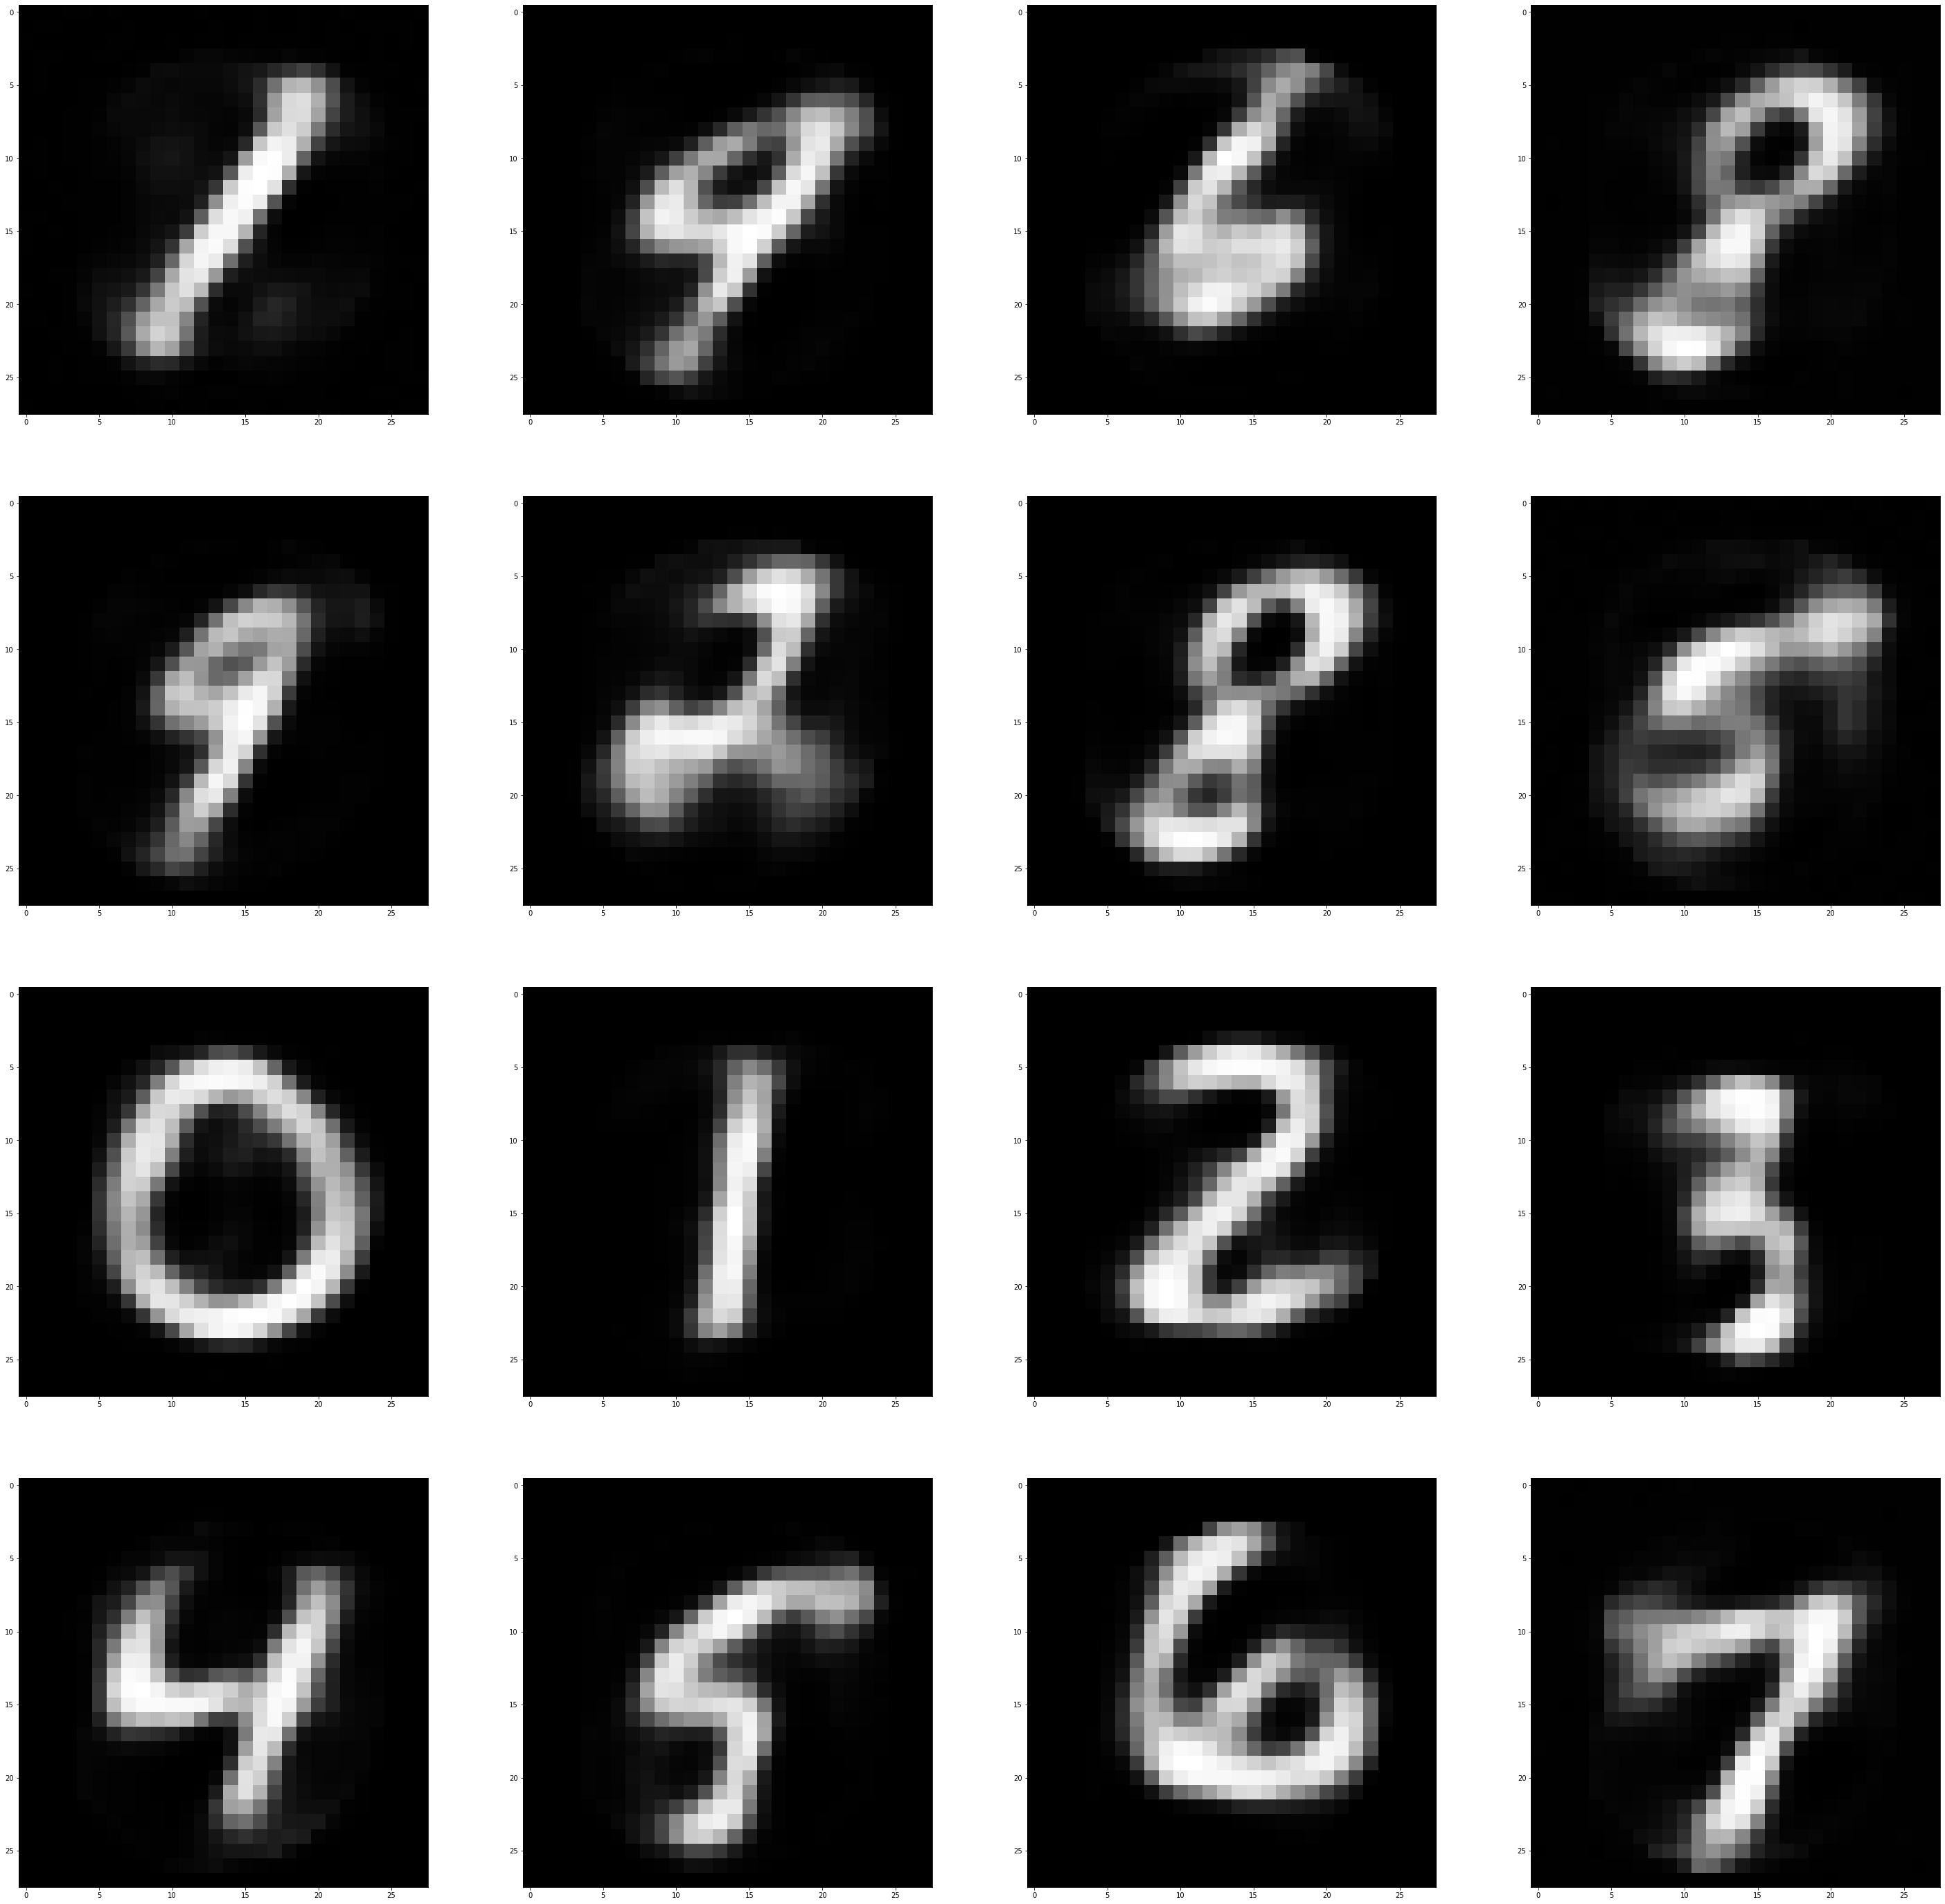

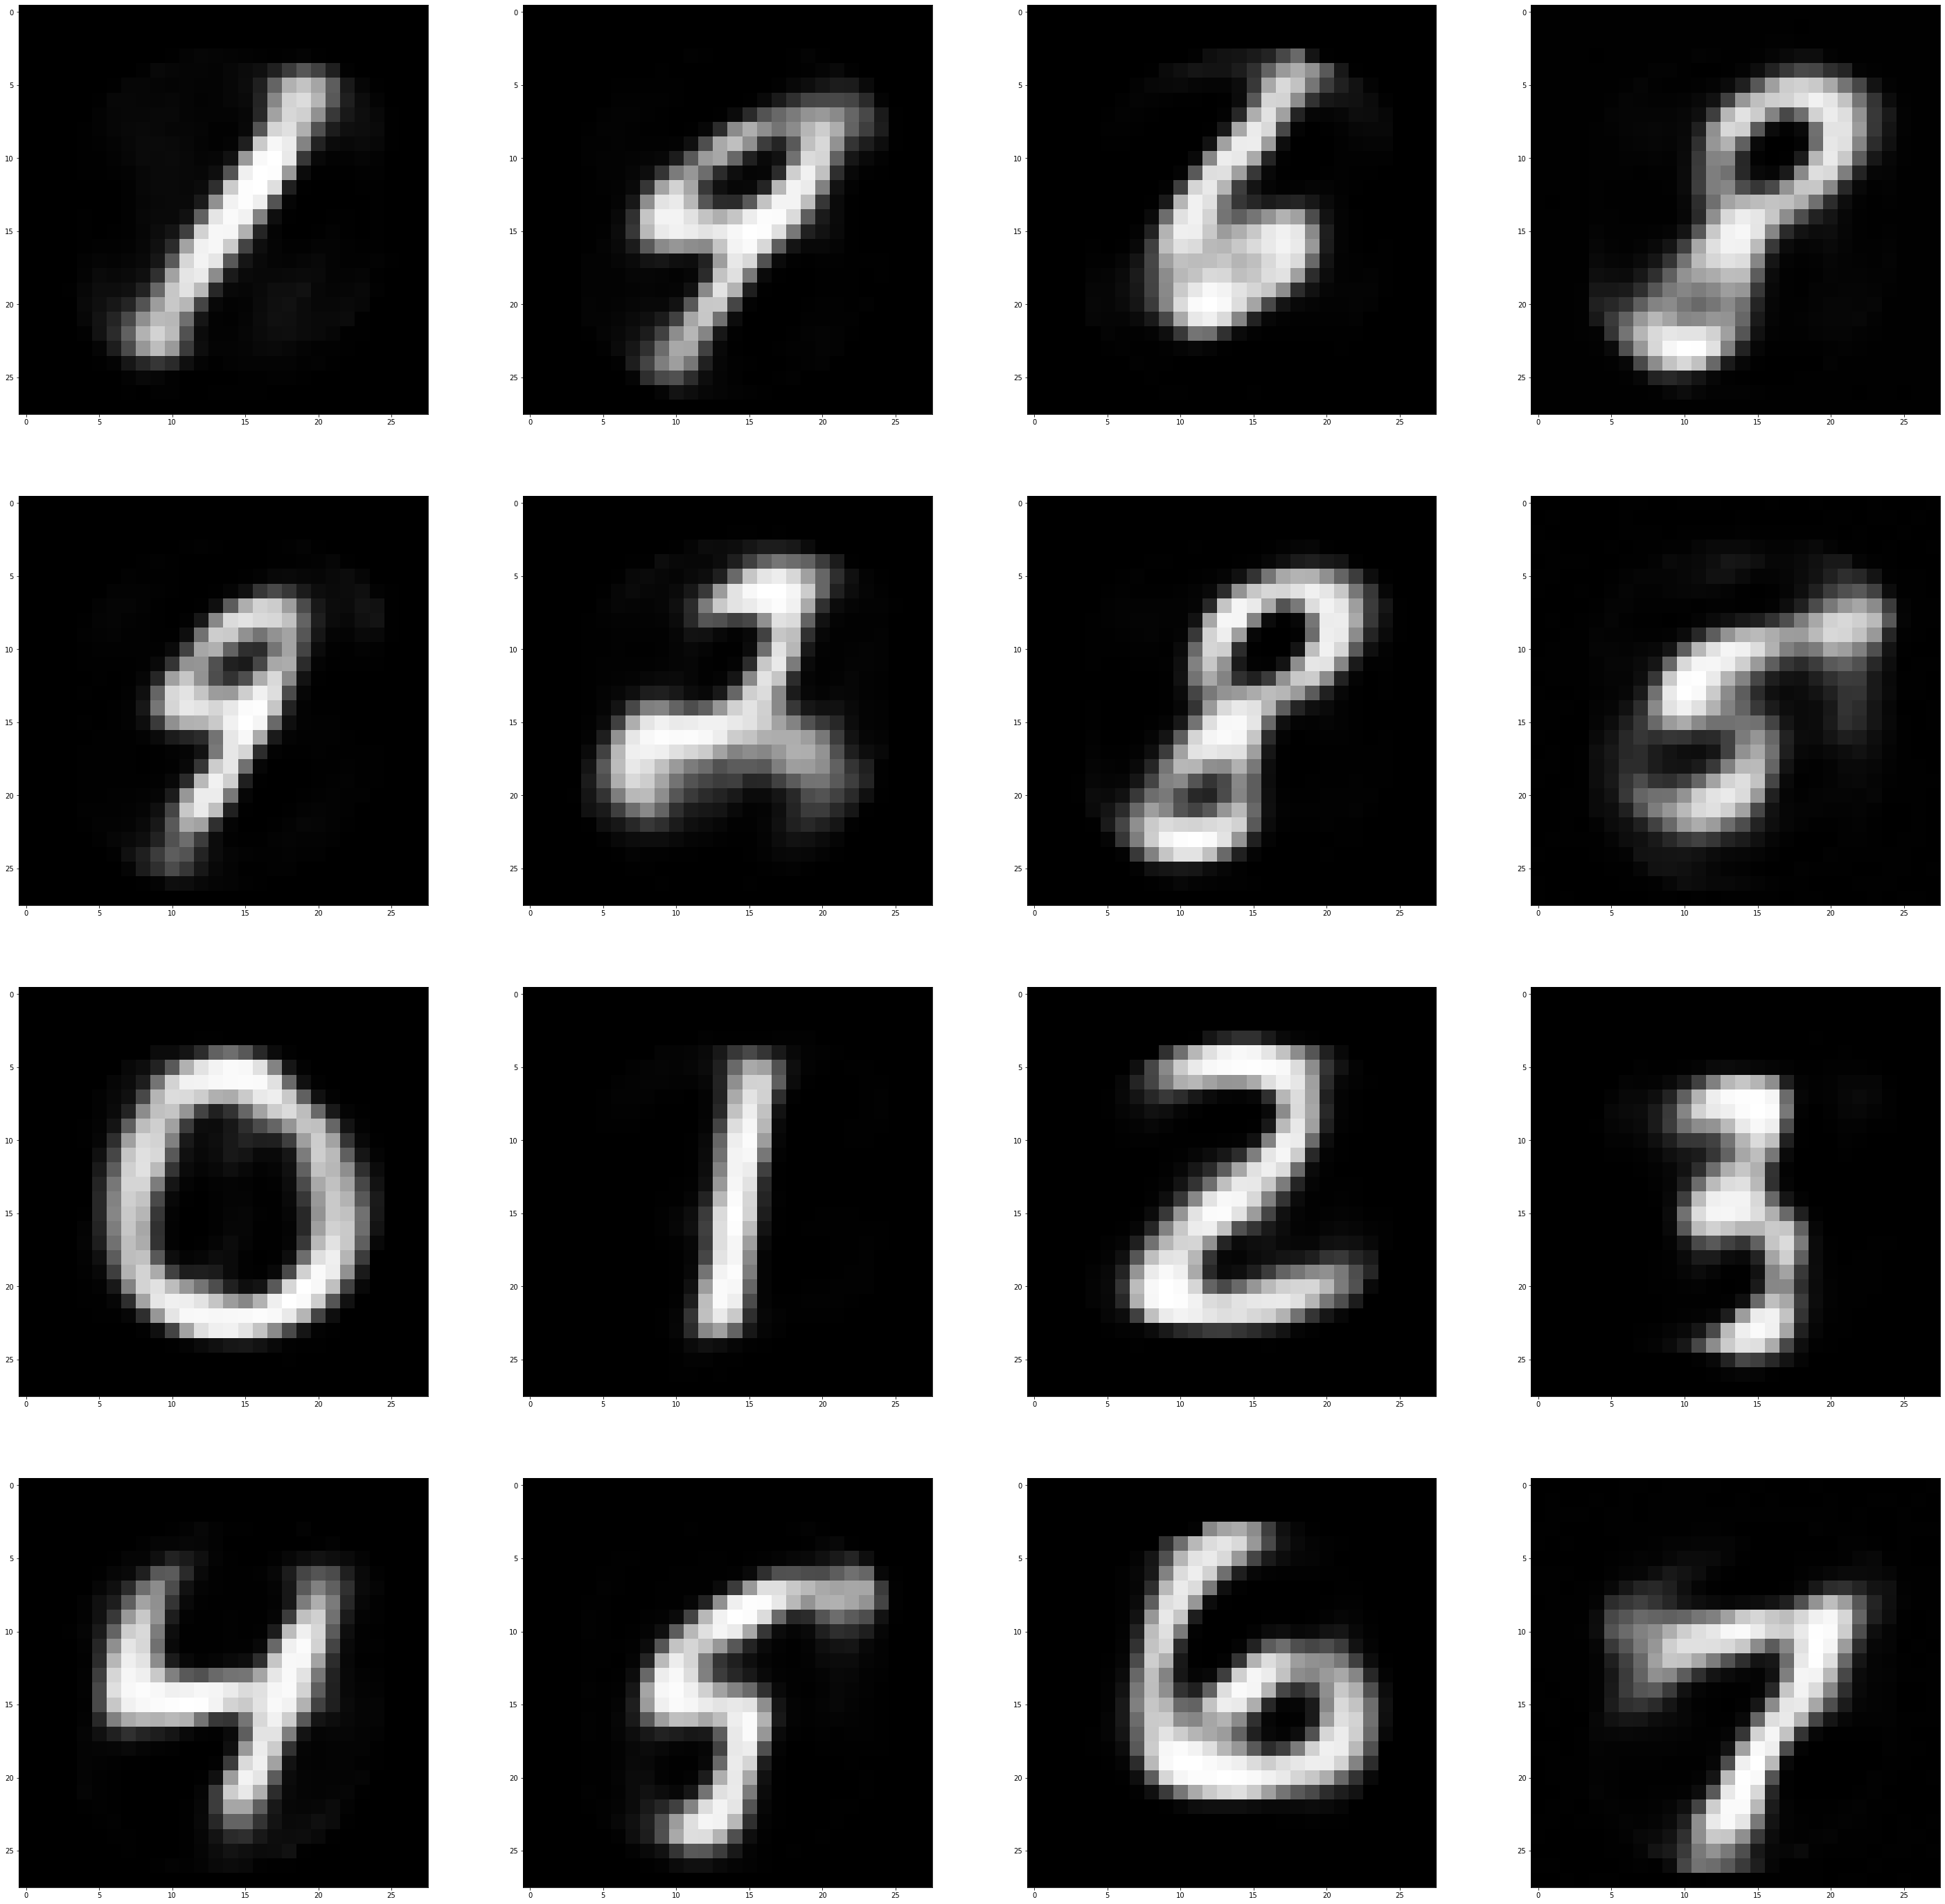

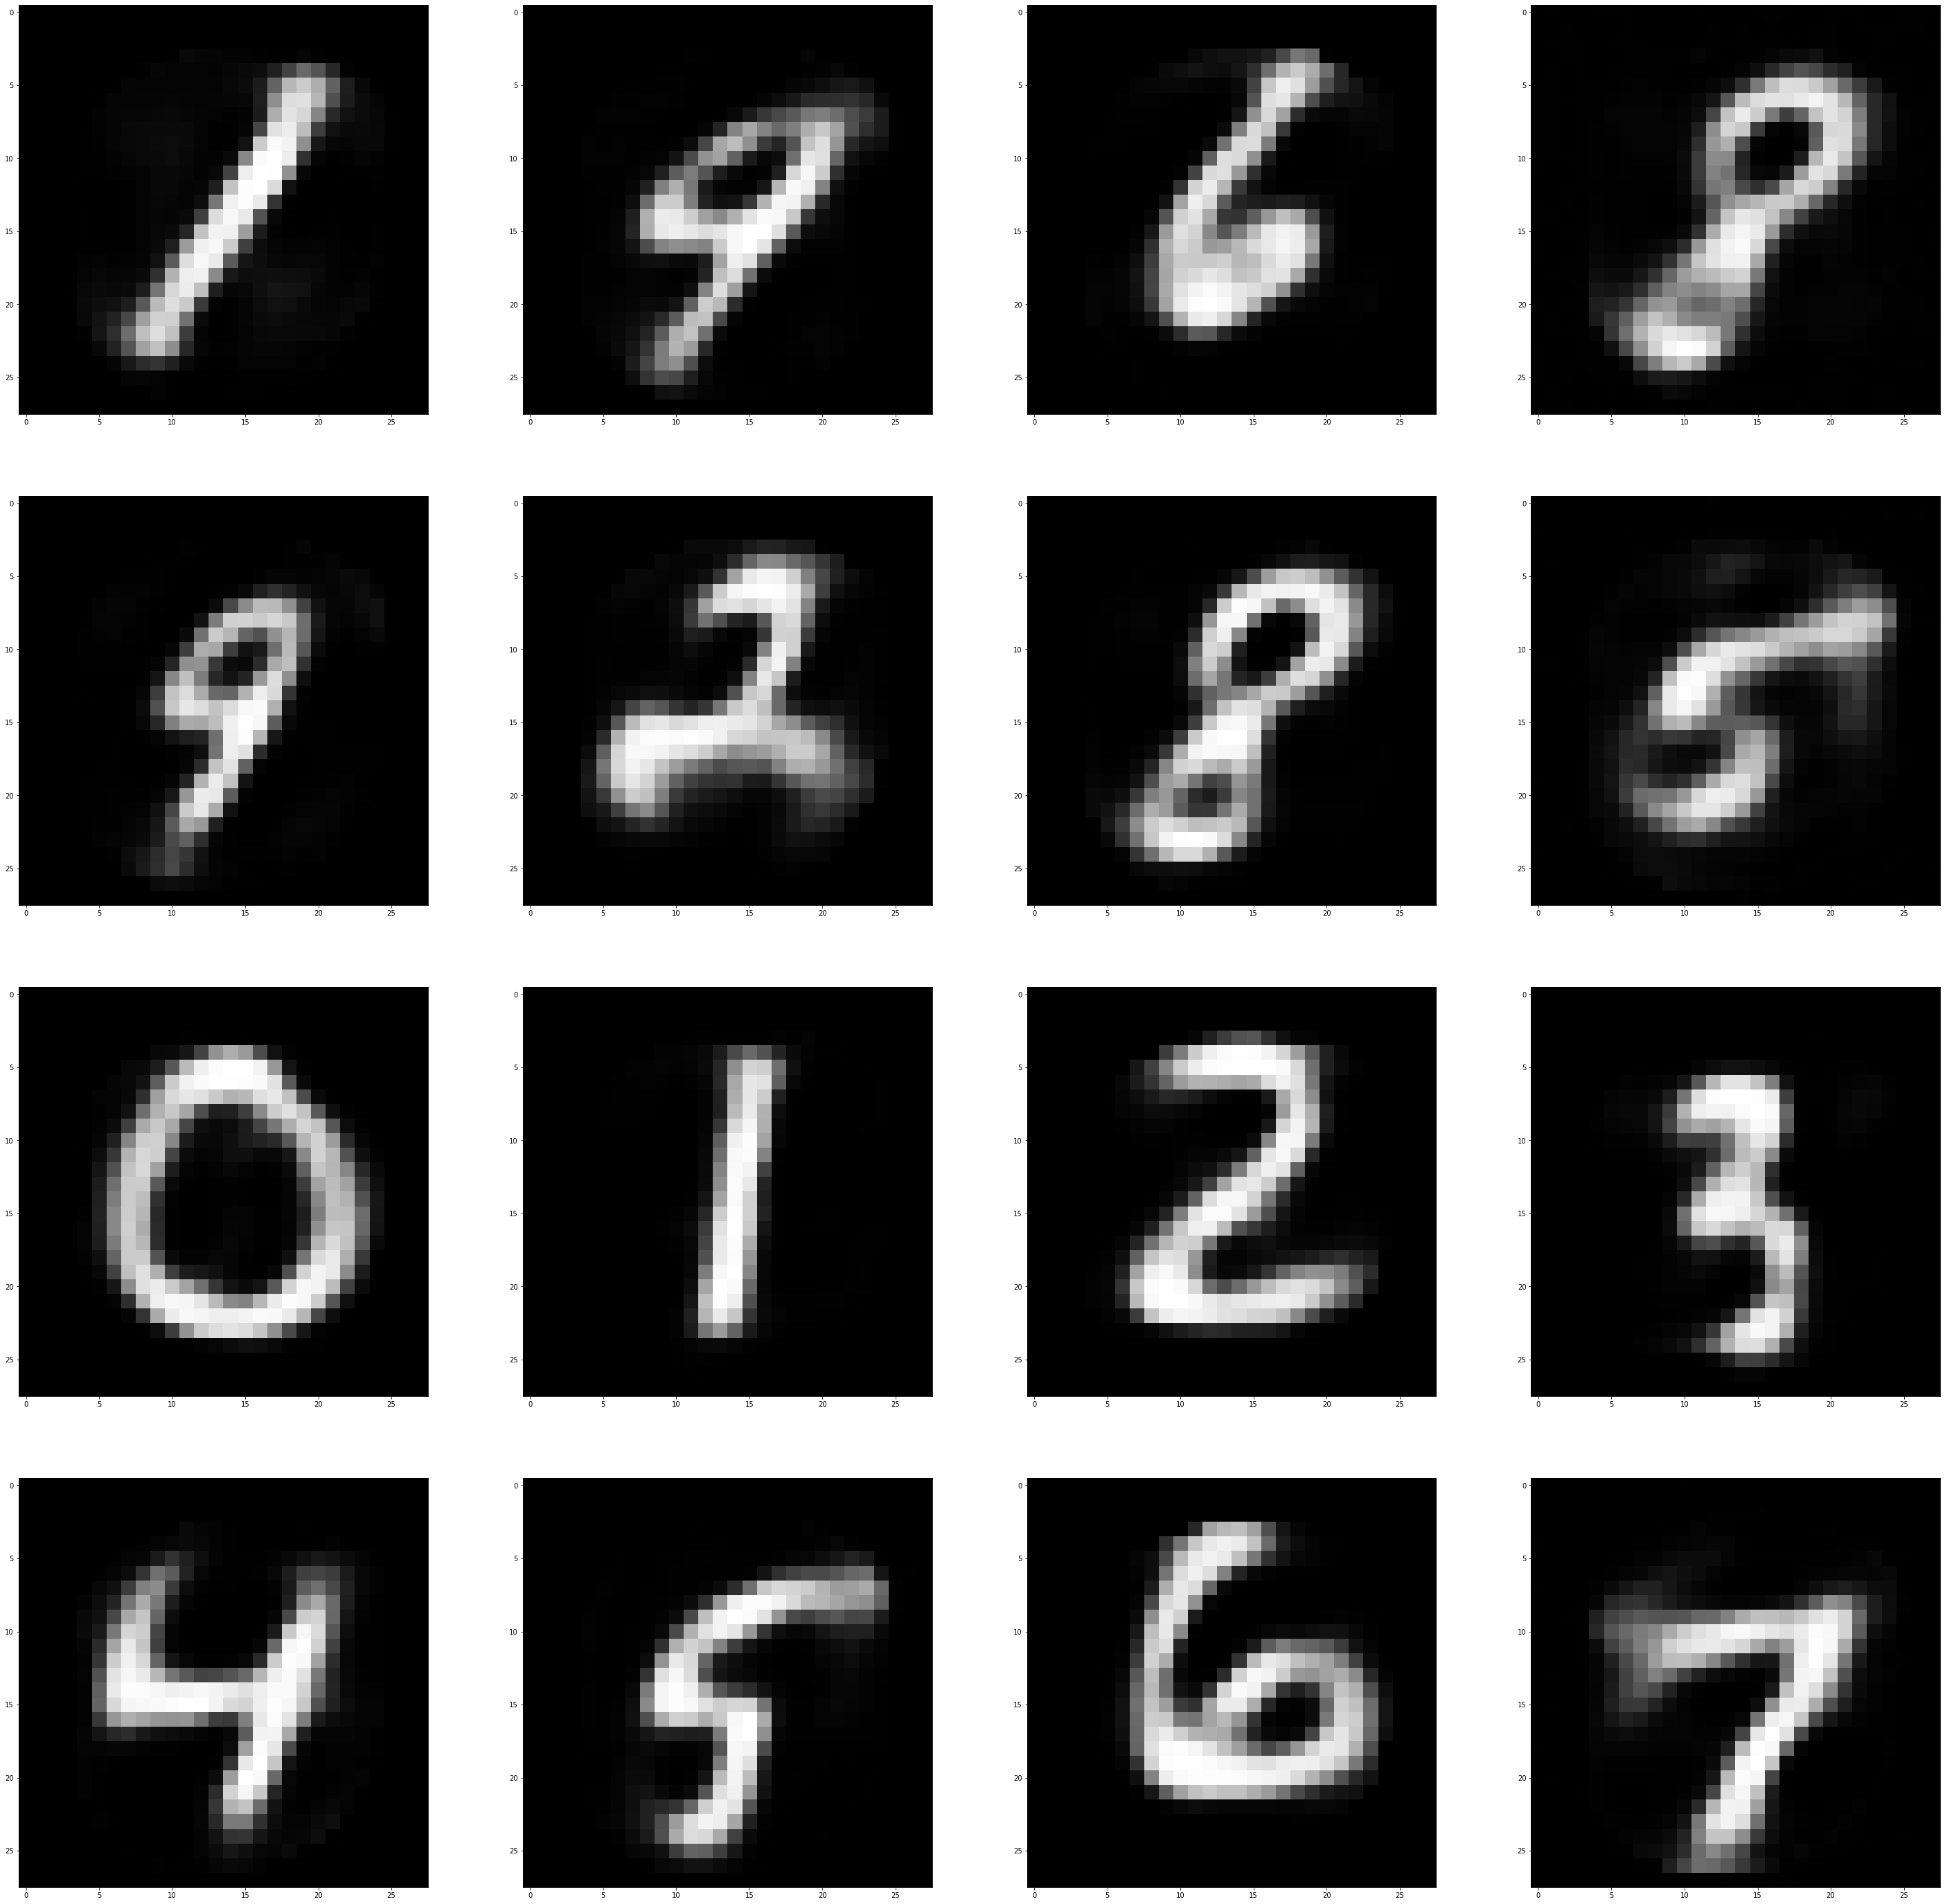

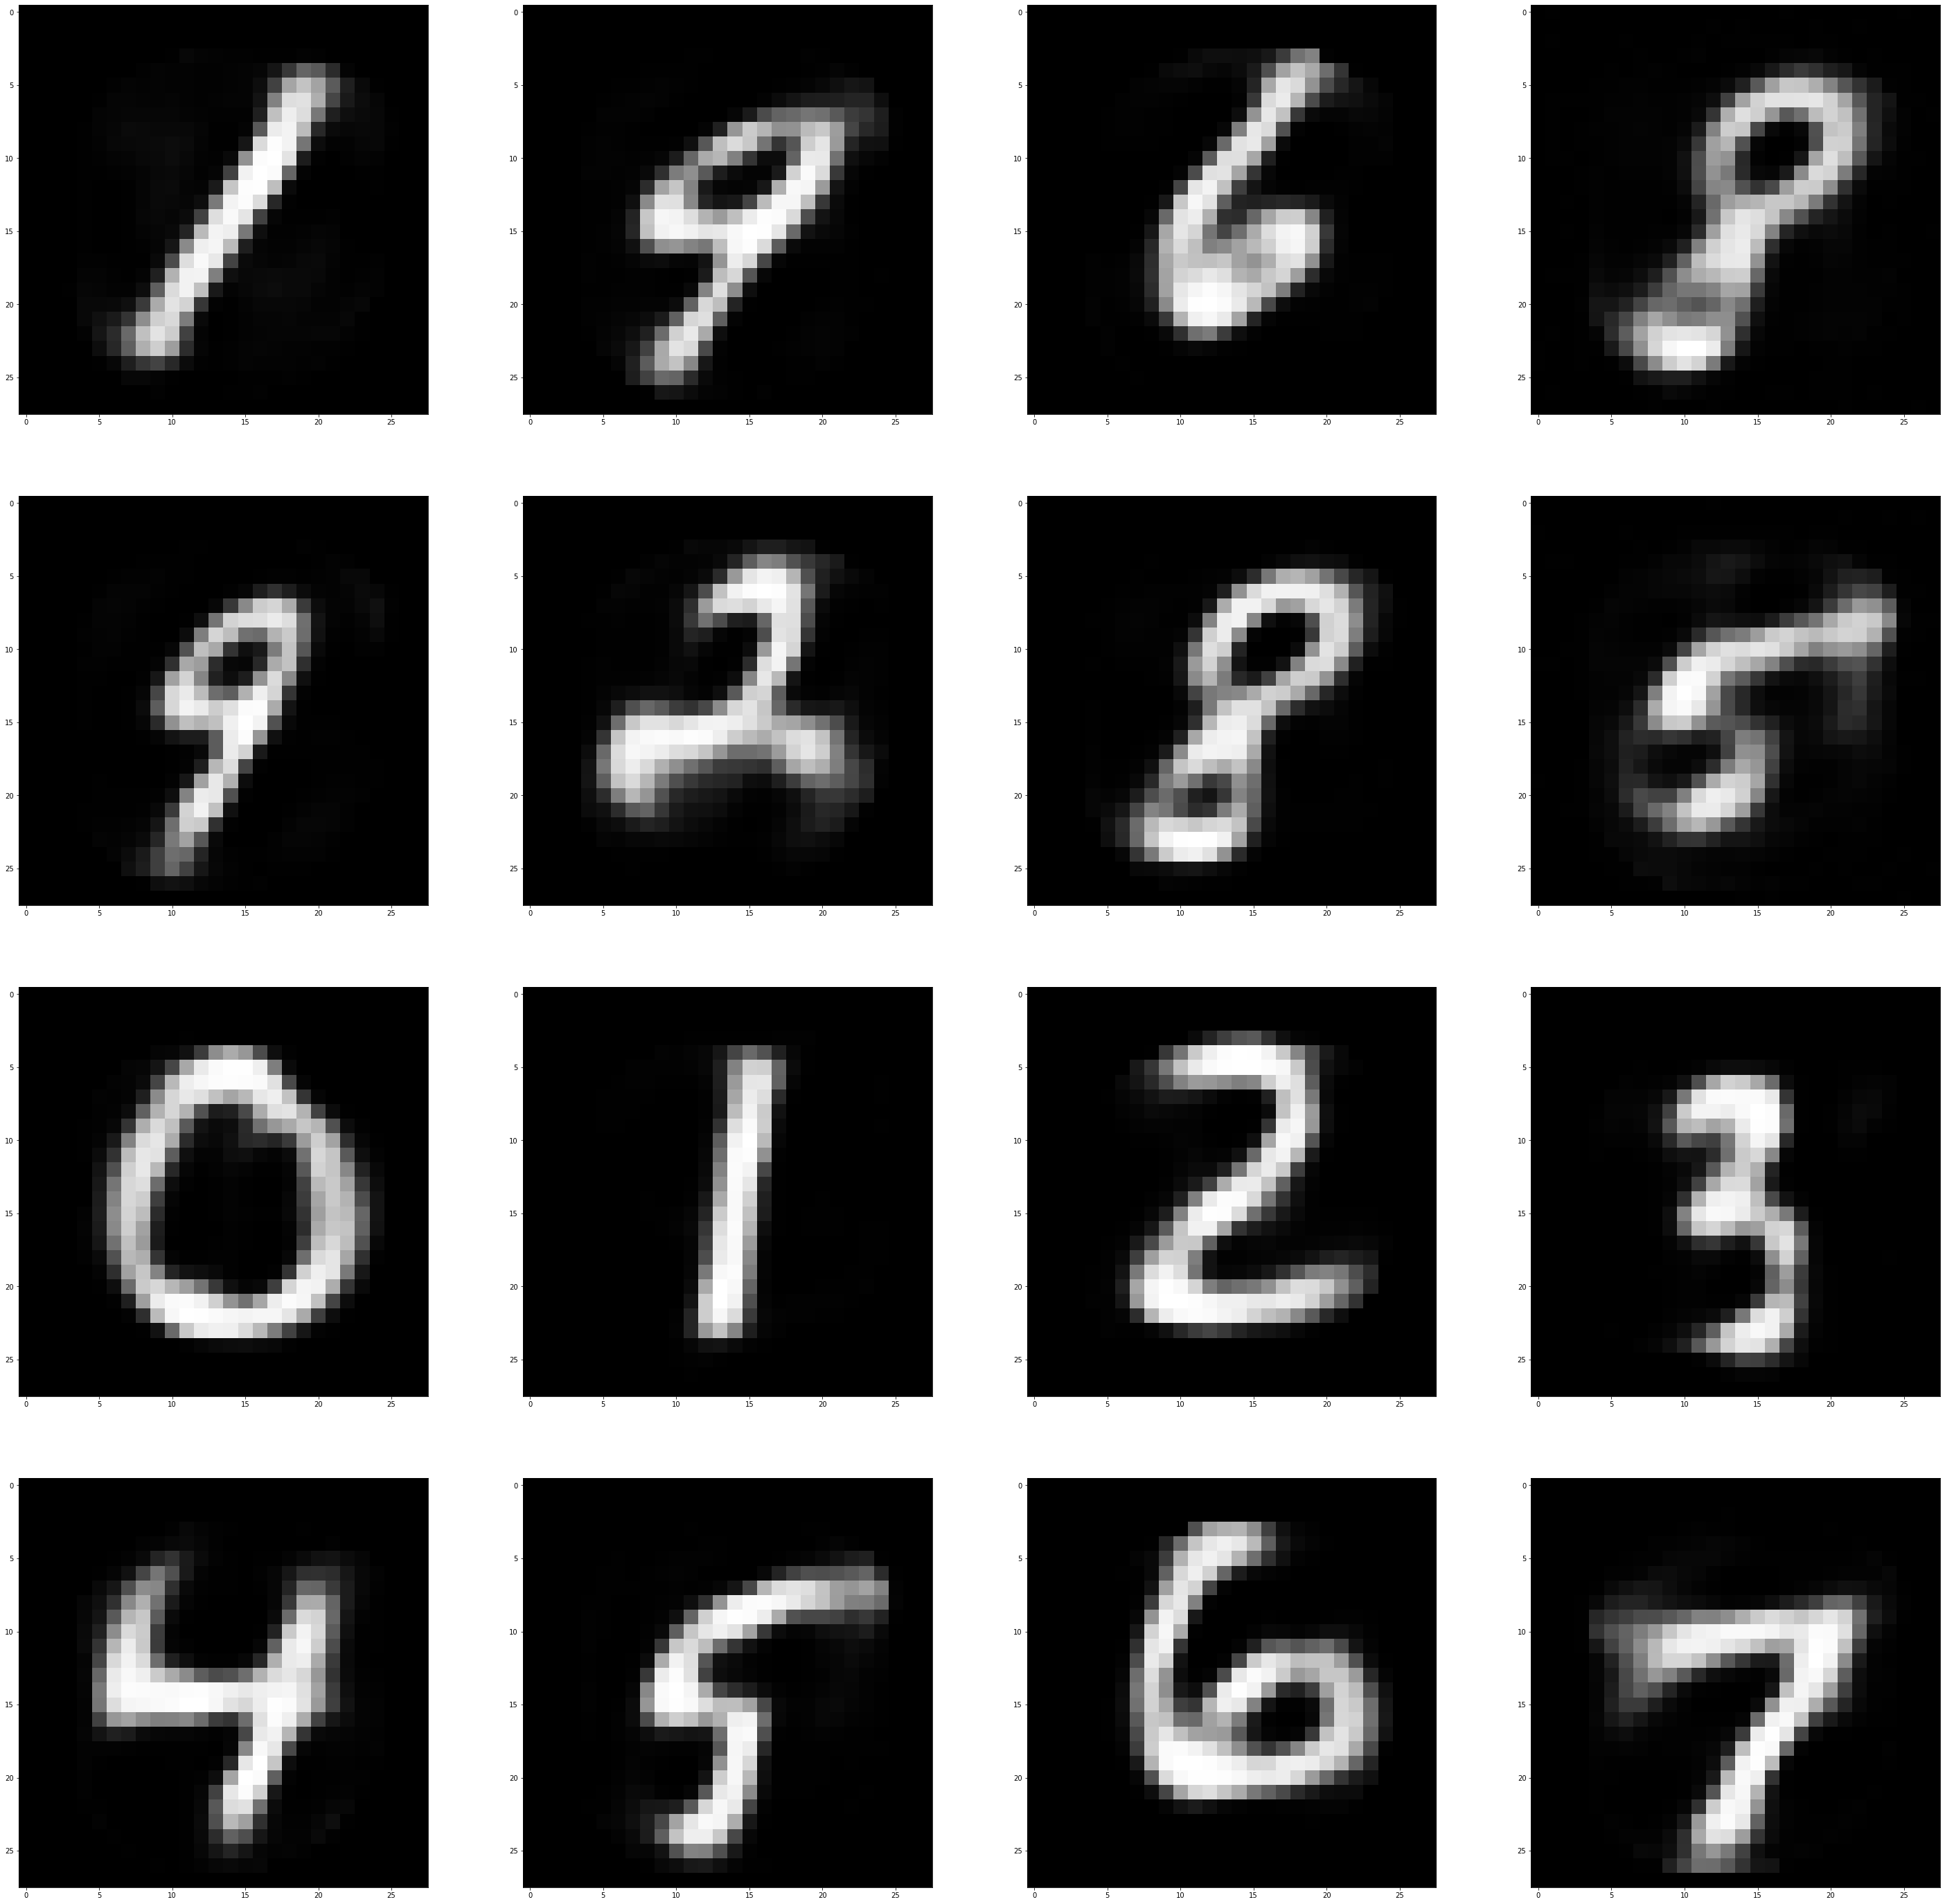

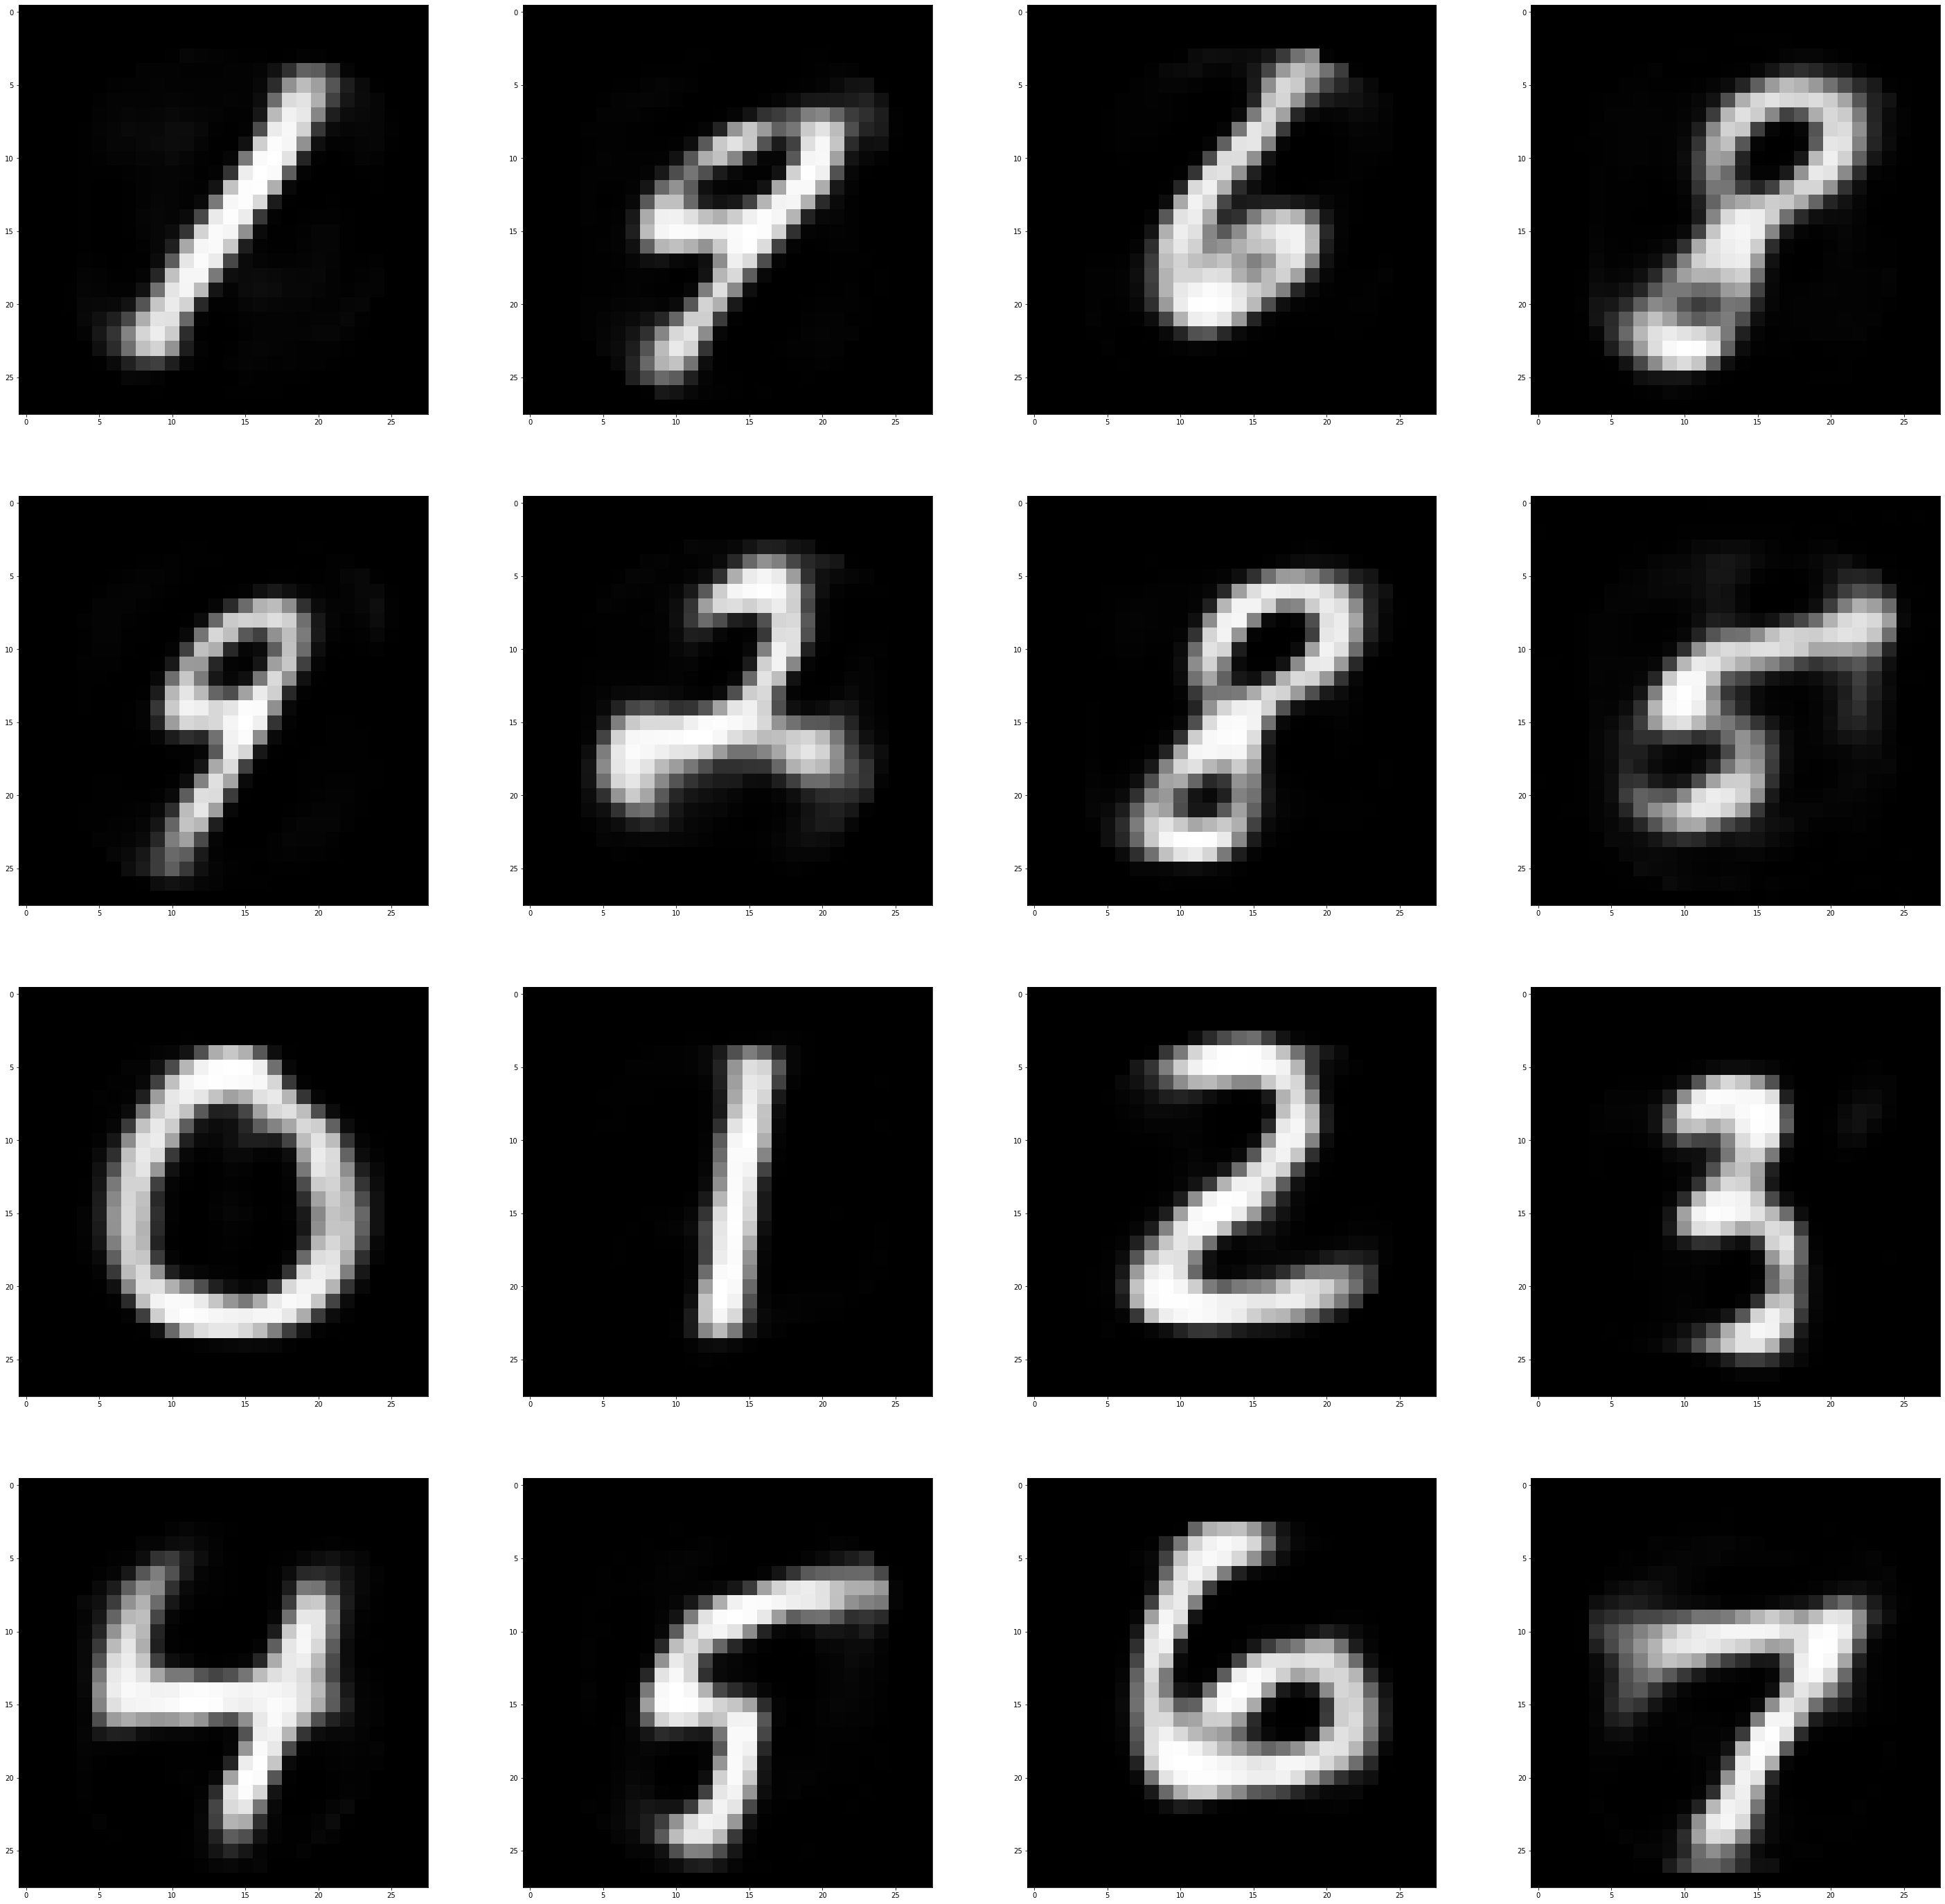

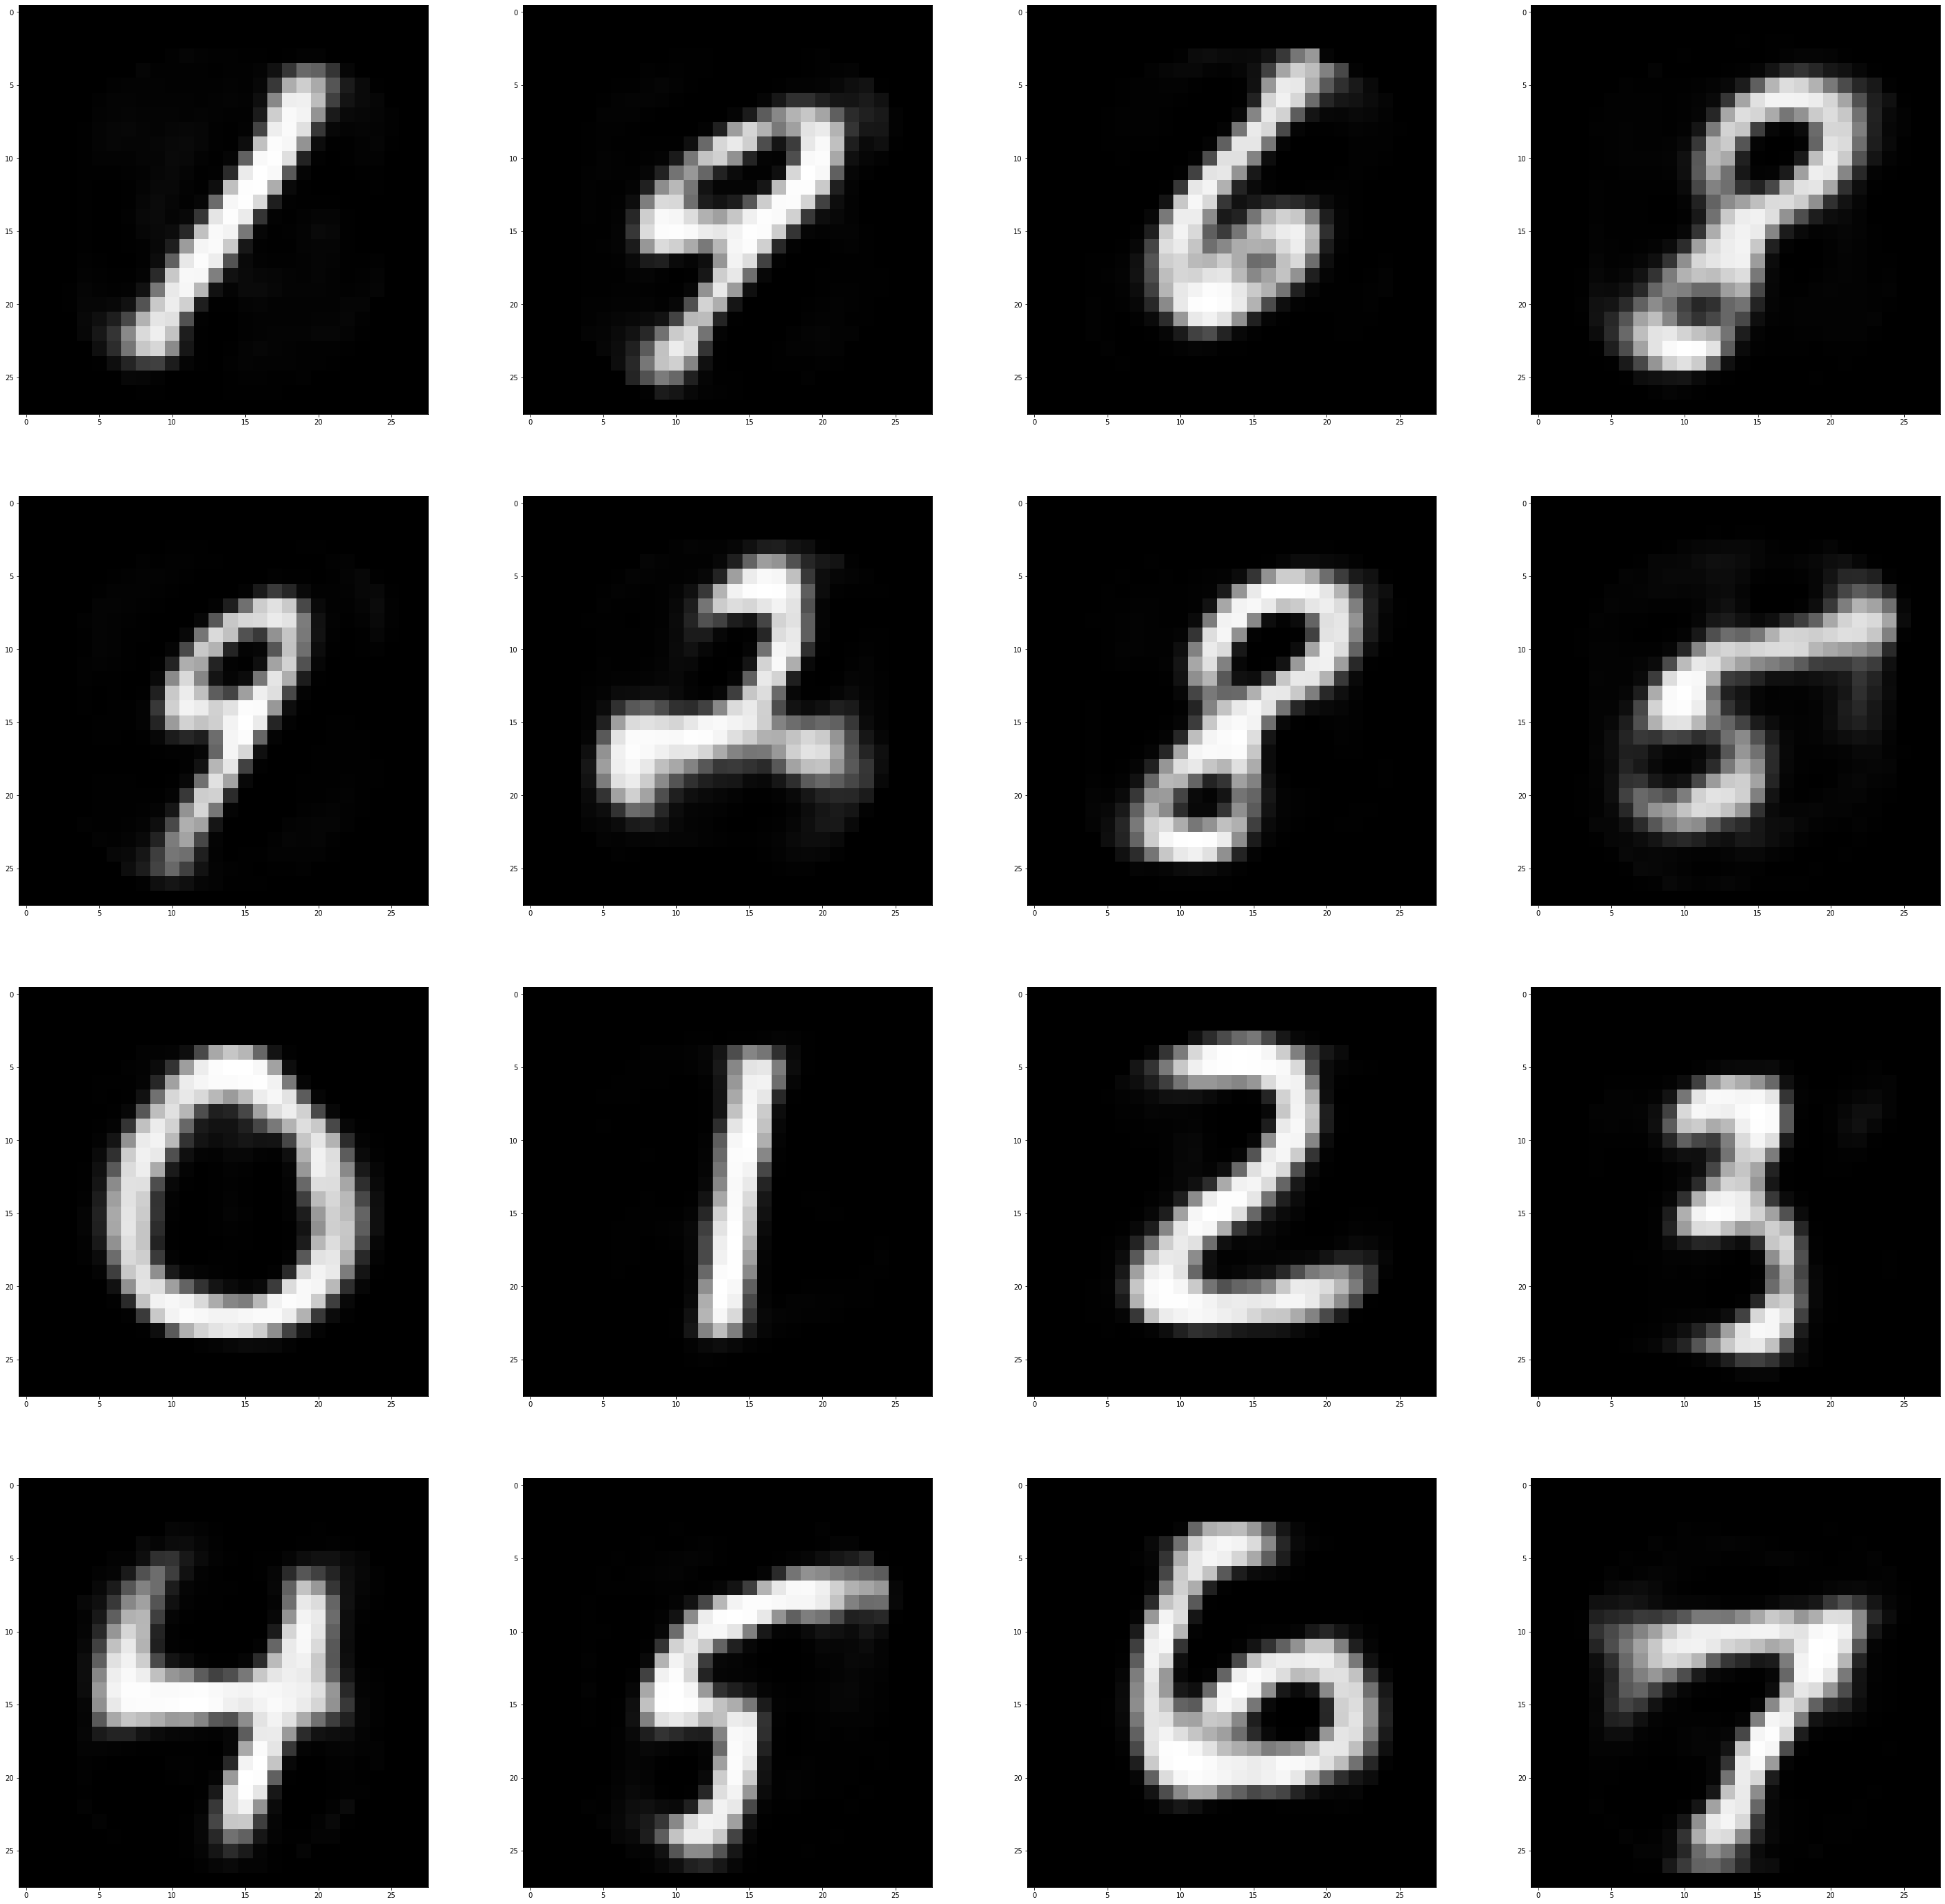

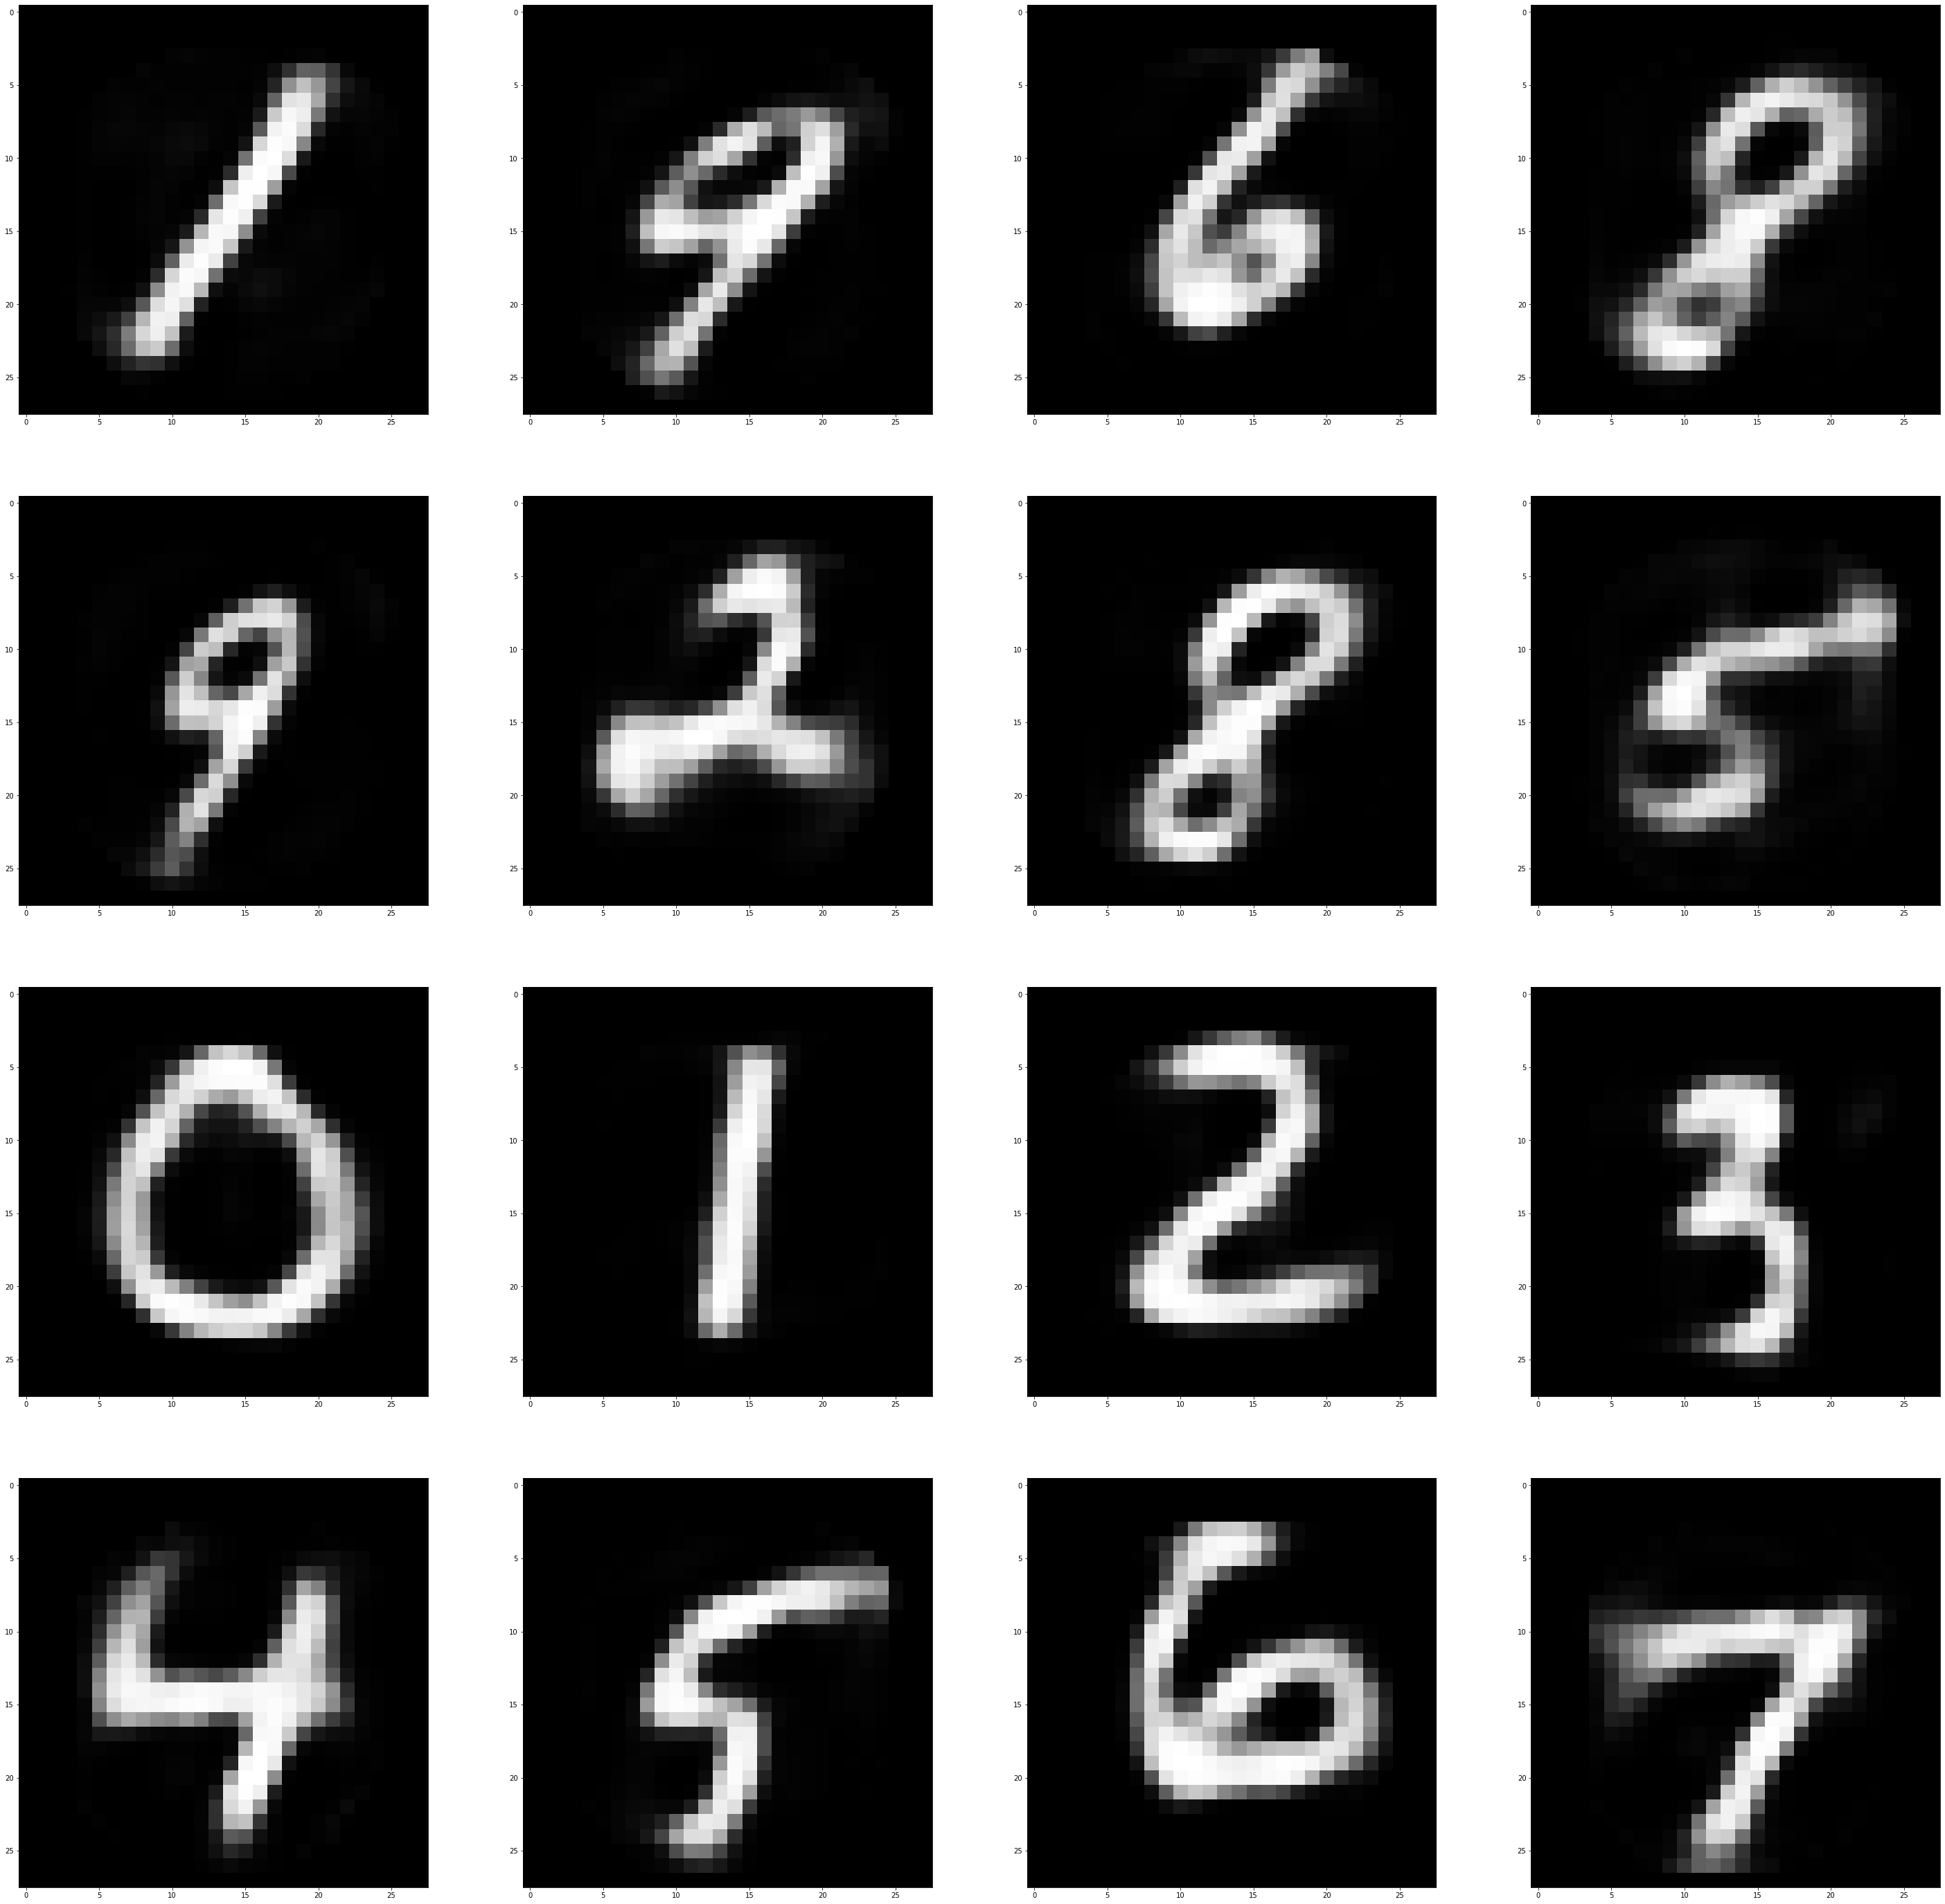

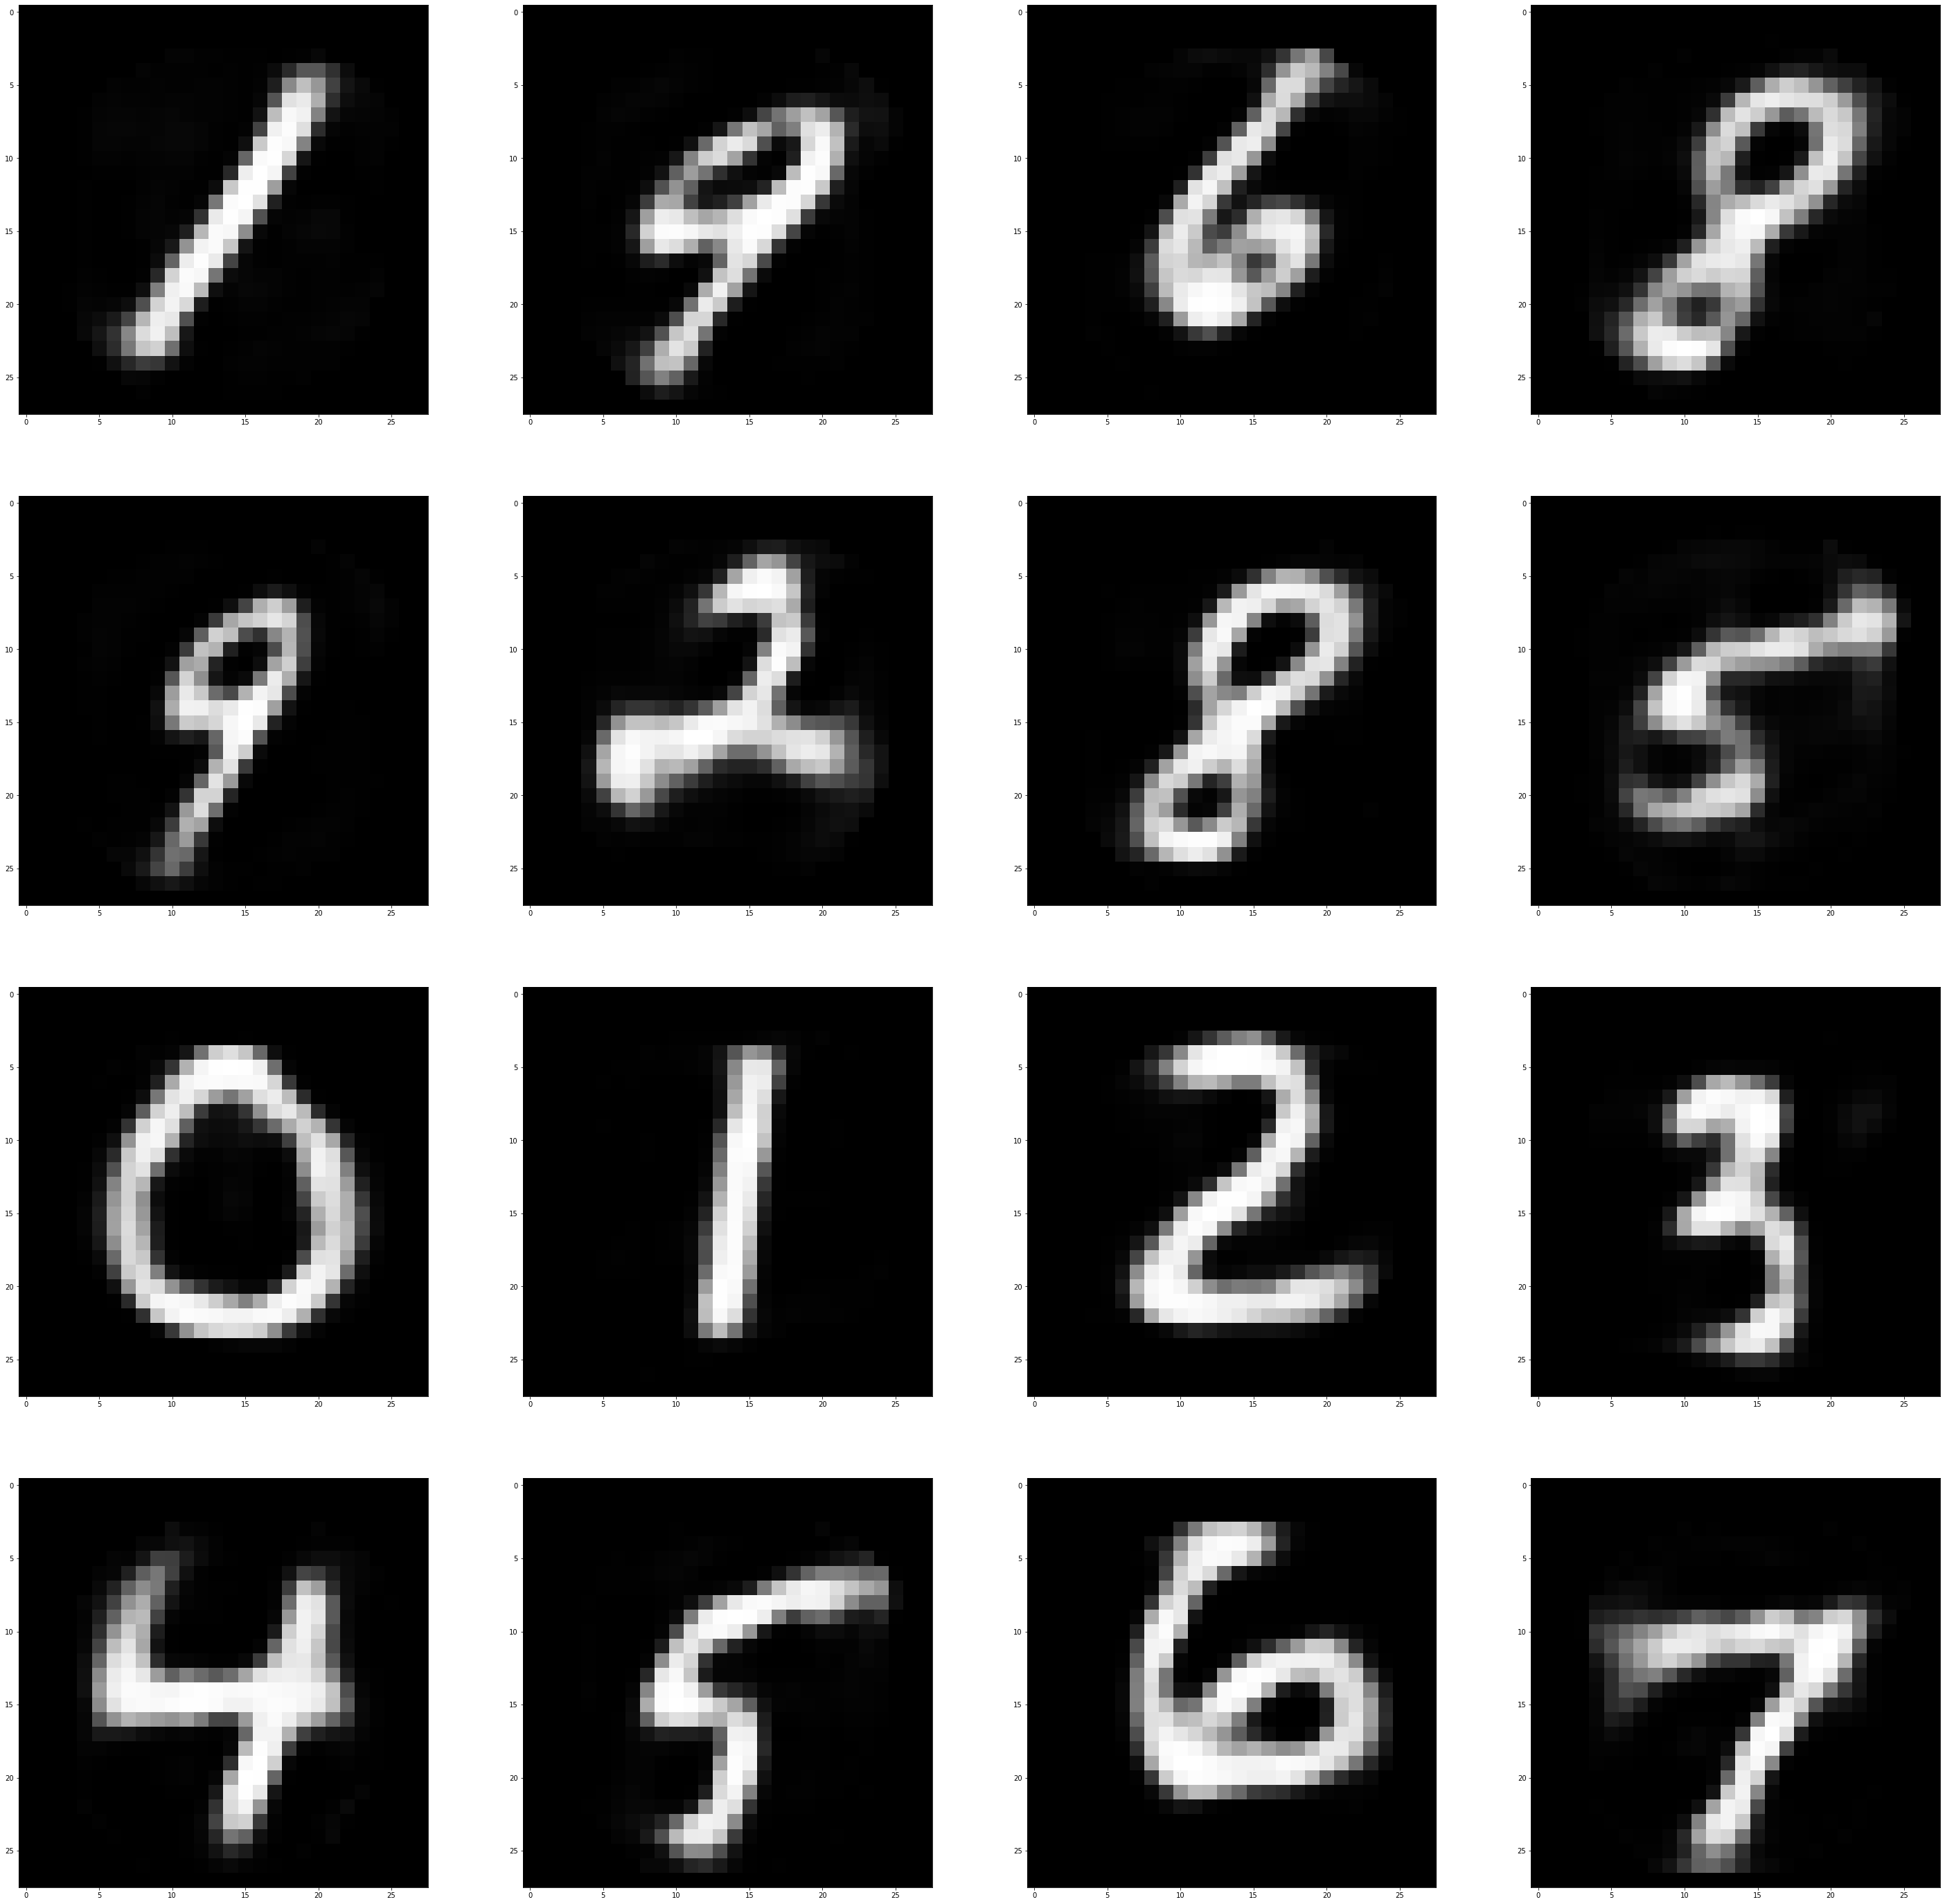

In [0]:
# If you are confused what h1, o1, D_w1, etc. means, 
#   refer to the notes at the top of the notebook.
# Otherwise, feel free to delete this comment.
losses = []

for epoch in range(NUM_EPOCHS): 
    for n in range(ITERATIONS_PER_EPOCH):
        
        ## Sample batch from dataset
        batch_indices = range(n*BATCH_SIZE, n*BATCH_SIZE + BATCH_SIZE)   
        X_batch = X[batch_indices]


        ## Forward propagation
        h1 = np.dot(X_batch, w1)## FILL HERE ##

        
        o1 = relu(h1)## FILL HERE ##
        h2 = np.dot(o1, w2)## FILL HERE ##

        o2 = sigmoid(h2)## FILL HERE ##

      
        loss = mean_squared_error(o2, X_batch)
        losses.append(loss)
        print('Epoch %d, Iteration %d -- Loss: %.6f' % (epoch + 1, epoch * ITERATIONS_PER_EPOCH + n, loss))
            
        ## Backpropagation
        D_o2 = 2 * (o2 - X_batch) # Can you explain why? # derivative of sqared error
        D_h2 = sigmoid_backward(D_o2, o2)


        D_o1 = np.dot(D_h2, w2.T) ## FILL HERE ##
        D_w2 = np.dot(o1.T, D_h2) ## FILL HERE ##
        D_h1 = relu_backward(D_o1, o1) ## FILL HERE ##
        
        D_w1 = np.dot(X_batch.T, D_h1) ## FILL HERE ##
        
        ## Parameter updates
        w1 -= D_w1 * LEARNING_RATE
        w2 -= D_w2 * LEARNING_RATE


       
        if n % 10 == 0:
            plt.figure()
            plt.title('Original %d dimensional image' % INPUT_SIZE)
            plt.imshow(X_batch[0].reshape(28, 28)); plt.show()
            
            
            plt.figure()
            plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
            plt.imshow(o2[0].reshape(28, 28)); plt.show()
       

    
    


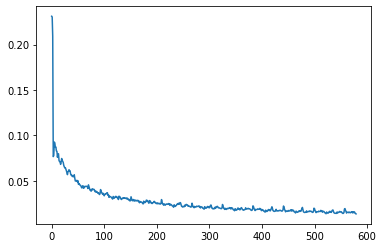

In [0]:
fig = plt.figure()
plt.plot(losses)
plt.show()
fig.savefig("output/loss.png")

In [0]:
#!zip content/output/file.zip content/output

	zip warning: name not matched: content/output

zip error: Nothing to do! (content/output/file.zip)
